In [1]:
import csv
from os import listdir
from os.path import isfile, isdir, join,abspath
import os
import pandas as pd
import numpy as np
from numpy.testing import assert_almost_equal
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
mypath = "EMGdata/1205"# 指定要列出所有檔案的目錄
test=['17','20','54','72','76','108'] #檔案的數字編號
le =  [840,1080,990,1070,1030,680]    #病人在不同時段的levodopa值
U =  []               #病人在不同時段的UPDRS值
label=['pre', 'h1', 'h2','h3','h4','h5'] #採集資料的時間區段名稱
patient='lin1205'     #病人名稱，後面可加日期加以區分
#name='lin'
levodopa_on=True     #有無需要計算包含levodopa的相關矩陣
UPDRS_on=False      #有無需要計算包含UPDRS的相關矩陣
testname='teat'       #檔案名稱裡包含數字編號前的字串
testorder=1           #在檔案名稱中的幾個順序裡有檔案數字
folder=patient+'/'+patient  #要存放輸出結果的資料夾+病人名稱

In [3]:
dir=(patient)  #EMG檔案的存放位置
if not os.path.exists(dir):
         os.mkdir(dir)

# 列出所有檔案

In [4]:
for filename in listdir(mypath):
    fullpath = join(mypath,filename)
    print(fullpath)

EMGdata/1205\20221205_teat108-10_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1205\20221205_teat108-1_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1205\20221205_teat108-2_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1205\20221205_teat108-3_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1205\20221205_teat108-4_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1205\20221205_teat108-5_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1205\20221205_teat108-6_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1205\20221205_teat108-7_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1205\20221205_teat108-8_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1205\20221205_teat108-9_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1205\20221205_teat17-10_walking_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1205\20221205_teat17-1_walking_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1205\20221205_teat17-2_walking_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1205\20221205_teat17-3_walking_Plot_and_Store_

# 確認檔案數字有在檔案名稱裡

In [5]:
fullpath.split("_")[testorder]

'teat76'

In [6]:
df = pd.DataFrame()
 
data = pd.read_excel(fullpath, sheet_name=None)
 
sheet = pd.ExcelFile(fullpath)

# EMG檔案裡的指標名稱

In [7]:
sheet.sheet_names

['Ku', 'CD', 'PSD_3_to_7', 'PSD_12_to_30', 'PSD_20_to_40']

# 取得EMG資料裡１６個頻道的指標的函式

In [8]:
def getburst(data):
    burstduration=[]
    burstdurationsd=[]
    burstinterval=[]
    burstintervalsd=[]   
    df=data.get('Ku')
    Bi=[]
    Bd=[]
    for num in range(16):
        bd=[]
        bi=[]
        val1=0
        val2=0
        for i in range(len(df)):
            n=str(num+1)
            if(df['Off_'+n][i]!=0):
                val1+=1
                bd.append(df['Off_'+n][i]-df['On_'+n][i])   
            if((df['Off_'+n][i]!=0)and(i!=0)):
                bi.append(df['On_'+n][i]-df['Off_'+n][i-1]) 
                val2+=1
        if(val1==0):
            burstduration.append(0)
            burstdurationsd.append(0)
        else:
            burstduration.append(np.mean(bd))
            burstdurationsd.append(np.std(bd))
        if(val2==0):
            burstinterval.append(0)
            burstintervalsd.append(0)
        else:
            burstintervalsd.append(np.std(bi))
            burstinterval.append(np.mean(bi))
        Bi.append(bi)
        Bd.append(bd)
    return (burstduration,burstdurationsd,burstinterval,burstintervalsd,Bi,Bd)

In [9]:
def get_ku(data):
    Ku=[]
    df1=data.get('Ku')
    Kustd=[]   
    Kudata=[]
    for num in range(16):
        ku=[]  
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['Ku_'+n][i]!=0):
                val+=1
                ku.append(df1['Ku_'+n][i])
        if(val==0):
            Ku.append(0)
        else:
            Ku.append(np.mean(ku))
            Kustd.append(np.std(ku))
        Kudata.append(ku)
    return(Ku,Kustd,Kudata)

In [10]:
def get_corr(data):
    CorrDim=[]
    CorrDimstd=[]
    df1=data.get('CD')   
    corrdata=[]
    for num in range(16):
        cd=[]
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['CD_'+n][i]!=0):
                val+=1
                cd.append(df1['CD_'+n][i])
        if(val==0):
            CorrDim.append(0)
        else:
            CorrDim.append(np.mean(cd))
            CorrDimstd.append(np.std(cd))
        corrdata.append(cd)
    return(CorrDim,CorrDimstd,corrdata)

In [11]:
def get_PSD_3_to_7(data):
    PSD_3_to_7=[]
    df1=data.get('PSD_3_to_7')   
    for num in range(16):
        psd=0
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['PSD_'+n][i]!=0):
                val+=1
                psd+=df1['PSD_'+n][i]

        PSD_3_to_7.append(psd/val)
    return(PSD_3_to_7)

In [12]:
def get_PSD_12_to_30(data):
    PSD_12_to_30=[]
    df1=data.get('PSD_12_to_30')   
    for num in range(16):
        psd=0
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['PSD_'+n][i]!=0):
                val+=1
                psd+=df1['PSD_'+n][i]

        PSD_12_to_30.append(psd/val)
    return(PSD_12_to_30)

In [13]:
def get_PSD_20_to_40(data):
    PSD_20_to_40=[]
    df1=data.get('PSD_20_to_40')    
    for num in range(16):
        psd=0
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['PSD_'+n][i]!=0):
                val+=1
                psd+=df1['PSD_'+n][i]

        PSD_20_to_40.append(psd/val)
    return(PSD_20_to_40)

In [14]:
def getData(fullpath):
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    sheet = pd.ExcelFile(fullpath)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    
    Data= pd.DataFrame({'test': [patient+'_'+fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'kurtosis_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_3_to_7[i]],'PSD_12_to_30_'+n: [PSD_12_to_30[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]]}
        rows=pd.DataFrame.from_dict(rows)
        Data=pd.concat([Data, rows], axis=1)
    Data.set_index("test" , inplace=True)    
    return Data

# 檢視資料

In [15]:
Data= pd.DataFrame()

for filename in listdir(mypath):
    fullpath = join(mypath,filename)
    data=getData(fullpath)
    Data=pd.concat([Data, data], axis=0)

In [16]:
 Data

burstduration_1  burstinterval_1  kurtosis_1  CorrDim_1  \
test                                                                          
lin1205_teat108-10         0.403222         0.387200    8.819613   1.865041   
lin1205_teat108-1          0.682267         0.460413   16.725854   1.918462   
lin1205_teat108-2          0.341454         0.400275    8.683762   1.953559   
lin1205_teat108-3          0.444287         0.431877   11.449505   1.971523   
lin1205_teat108-4          0.355574         0.376421   11.744461   1.858548   
lin1205_teat108-5          0.288723         0.386861   13.105540   1.902983   
lin1205_teat108-6          0.790042         0.431386    9.692390   1.870766   
lin1205_teat108-7          0.420591         0.361292   14.319602   1.904152   
lin1205_teat108-8          0.430322         0.418829   10.275469   1.904318   
lin1205_teat108-9          0.467833         0.385950   10.978905   1.900337   
lin1205_teat17-10          0.347493         0.508746   10.622835   1.944235   
lin1205_teat17-1           0.429254         0.447478    6.461747   1.867726   
lin1205_teat17-2           0.233849         0.436446    6.565570   1.892231   
lin1205_teat17-3           0.416868         0.452115    7.585599   1.905470   
lin1205_teat17-4           0.345501         0.468452   10.476629   1.854602   
lin1205_teat17-5           0.419657         0.532605    9.150170   1.922954   
lin1205_teat17-6           0.461830         0.486976    8.148372   1.877431   
lin1205_teat17-7           0.237910         0.535941   11.297004   1.867519   
lin1205_teat17-8           0.402090         0.484142    9.250466   1.954342   
lin1205_teat17-9           0.403752         0.486016    8.312072   1.950657   
lin1205_teat20-10          0.547119         0.561334   12.698235   1.911013   
lin1205_teat20-1           0.700064         0.367083    7.026594   1.973581   
lin1205_teat20-2           0.353656         0.400589    7.514062   1.903391   
lin1205_teat20-3           0.484848         0.398206    7.535522   1.920996   
lin1205_teat20-4           0.734919         0.447102    6.913568   1.944280   
lin1205_teat20-5           0.302708         0.421538    7.092341   1.973745   
lin1205_teat20-6           0.231444         0.415464    6.619891   1.919725   
lin1205_teat20-7           0.365283         0.481604    9.019823   1.962553   
lin1205_teat20-8           0.246623         0.446187    8.682426   1.858926   
lin1205_teat20-9           0.304944         0.424366    8.008024   1.893788   
lin1205_teat54-10          0.269943         0.448510   12.078797   1.950978   
lin1205_teat54-1           0.516958         0.538898   13.744216   1.963002   
lin1205_teat54-2           0.314041         0.534629    9.737783   1.925371   
lin1205_teat54-3           0.501531         0.546032   14.647504   1.983558   
lin1205_teat54-4           0.371768         0.458095    8.411118   1.935843   
lin1205_teat54-5           0.287171         0.426863    8.583853   1.977914   
lin1205_teat54-6           0.332096         0.514626   14.523561   1.923072   
lin1205_teat54-7           0.351144         0.454938   12.062367   1.927234   
lin1205_teat54-8           0.387818         0.420833   10.126616   1.914598   
lin1205_teat54-9           0.377552         0.455686    8.403647   2.001045   
lin1205_teat72-10          0.441700         0.451409    9.550098   1.867543   
lin1205_teat72-1           0.458762         0.478372   11.233083   1.838577   
lin1205_teat72-2           0.565079         0.471122   10.805341   1.891340   
lin1205_teat72-3           0.398856         0.440544   10.205258   1.865045   
lin1205_teat72-4           0.470867         0.357189    7.972198   1.938961   
lin1205_teat72-5           0.565913         0.478881   11.201126   1.920048   
lin1205_teat72-6           0.323150         0.458338    8.652318   1.916603   
lin1205_teat72-7           0.412706         0.410205    8.470216   1.888186   
lin1205_teat72-8           0.302776         0.375842    8.378925   1.9

# 將每一channel的指標存到陣列裡的函式

In [17]:
def getsepData(fullpath):
    SepData=[]
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    sheet = pd.ExcelFile(fullpath)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    Data= pd.DataFrame({'test': [fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_3_to_7[i]],'PSD_12_to_30_'+n: [PSD_12_to_30[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]]}
        rows=pd.DataFrame.from_dict(rows)
        SepData.append(rows)   
    return SepData

# 頻域的指標

In [18]:
def getsepDatafreq(fullpath):
    SepData=[]
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    sheet = pd.ExcelFile(fullpath)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    Data= pd.DataFrame({'test': [fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        rows={'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]]}
        rows=pd.DataFrame.from_dict(rows)
        SepData.append(rows)
    return SepData

# 時域的指標

In [19]:
def getsepDatatime(fullpath):
    SepData=[]
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    sheet = pd.ExcelFile(fullpath)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    #
    Data= pd.DataFrame({'test': [fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] }
        rows=pd.DataFrame.from_dict(rows)
        SepData.append(rows)
  
    return SepData

# 加入血液濃度或UPDRS

In [20]:
def getcorData(fullpath):
    for i in range(len(test)):
        #may change
        if((testname+test[i]) in fullpath.split("_")[testorder]):
            if(levodopa_on&UPDRS_on):
                UPDRS=U[i]   
                levodopa=le[i]  
            elif(levodopa_on&(not UPDRS_on)): 
                levodopa=le[i] 
            elif((not levodopa_on)&UPDRS_on): 
                UPDRS=U[i]   
    SepData=[]
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    Data= pd.DataFrame({'test': [fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        if(levodopa_on&UPDRS_on):
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]],'levodopa_'+n:levodopa,'UPDRS_'+n:UPDRS}
        elif(levodopa_on&(not UPDRS_on)):    
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]],'levodopa_'+n:levodopa}
        elif((not levodopa_on)&UPDRS_on):    
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]],'UPDRS_'+n:UPDRS}
        else:
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]]}
        rows=pd.DataFrame.from_dict(rows)
        SepData.append(rows)
    return SepData

# 做出correlation matrix 

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


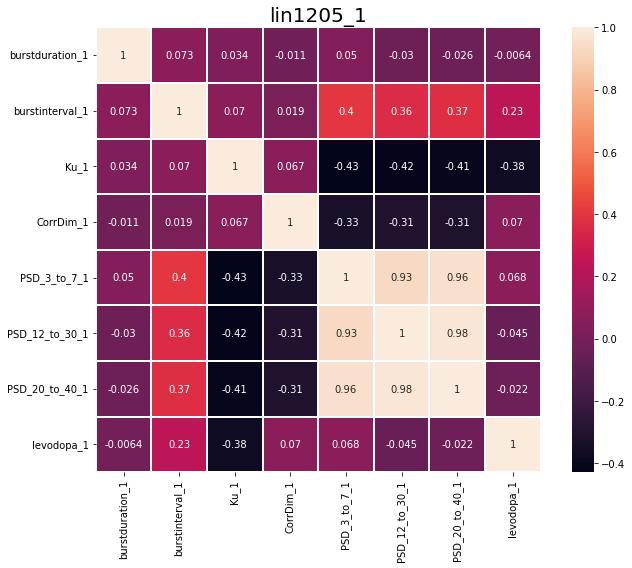

<Figure size 432x288 with 0 Axes>

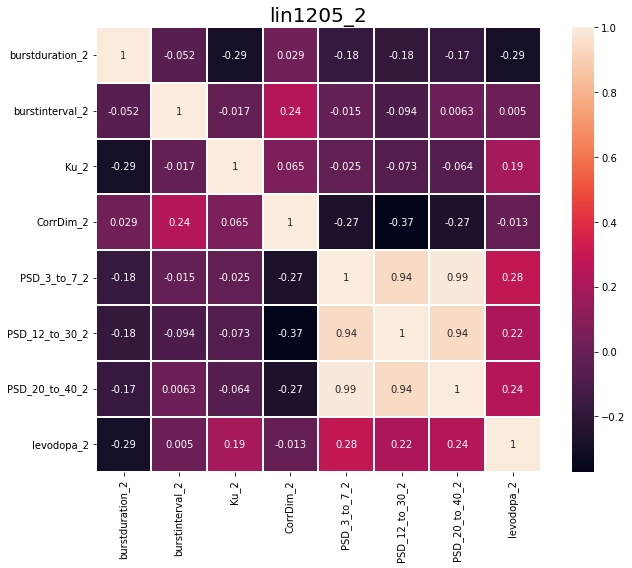

<Figure size 432x288 with 0 Axes>

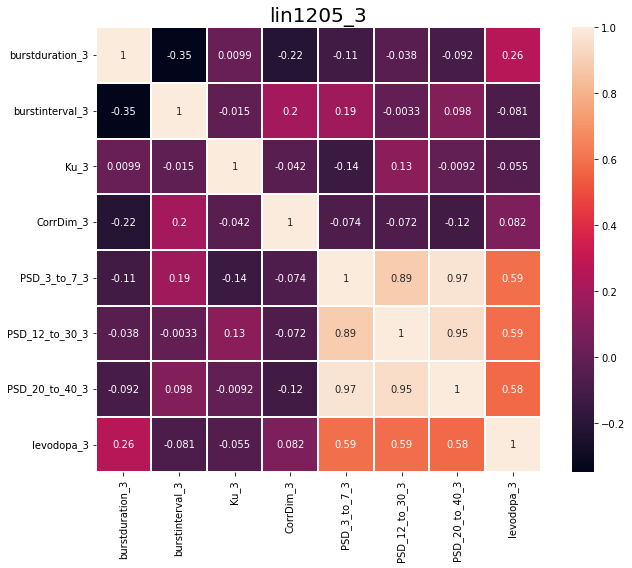

<Figure size 432x288 with 0 Axes>

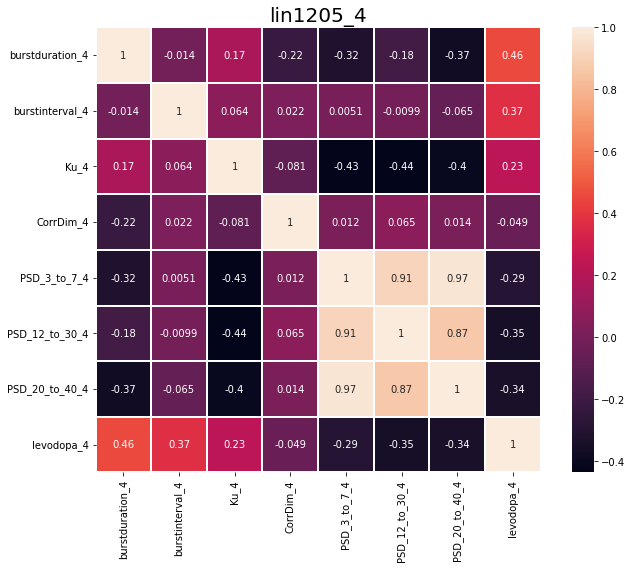

<Figure size 432x288 with 0 Axes>

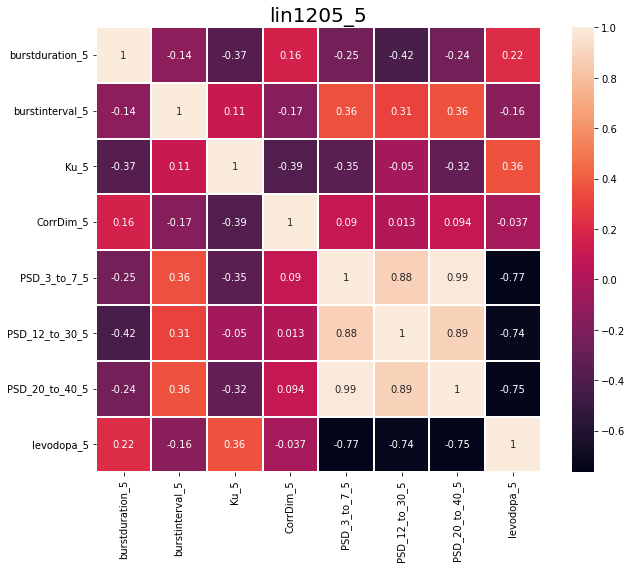

<Figure size 432x288 with 0 Axes>

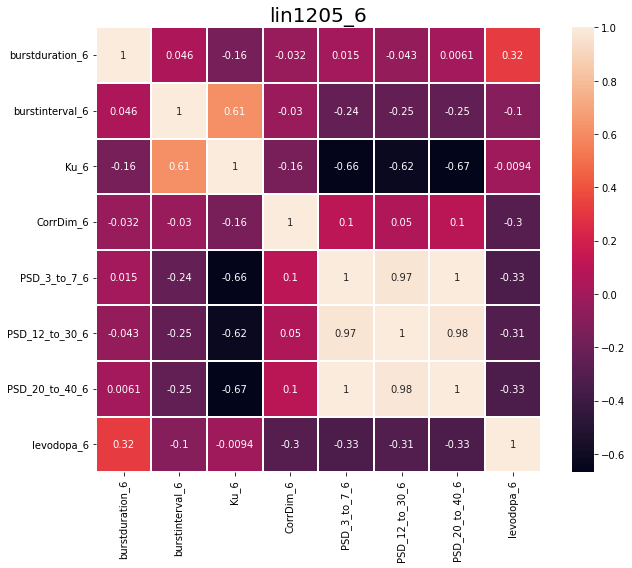

<Figure size 432x288 with 0 Axes>

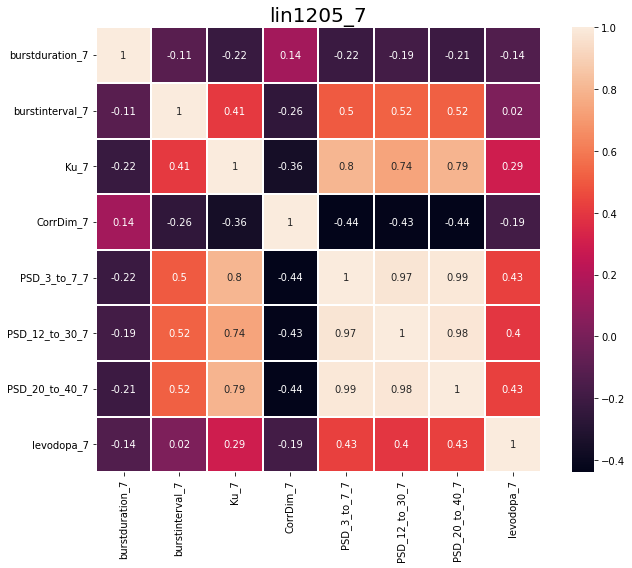

<Figure size 432x288 with 0 Axes>

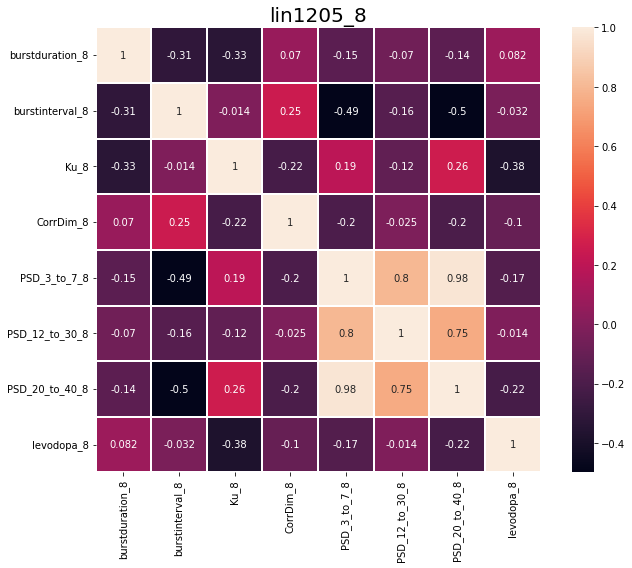

<Figure size 432x288 with 0 Axes>

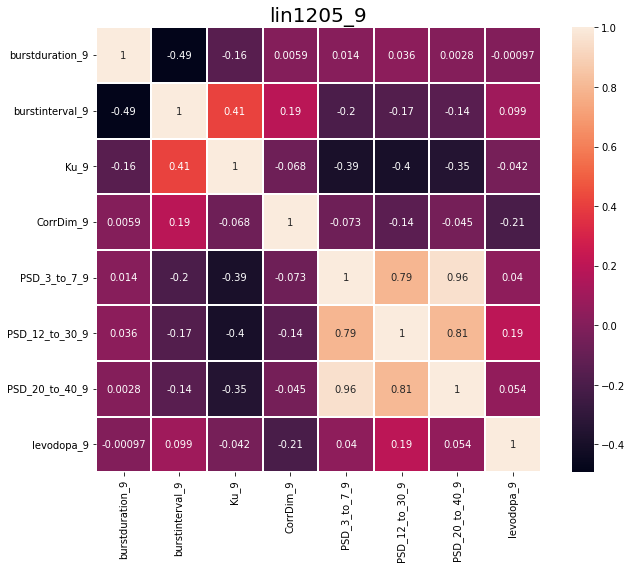

<Figure size 432x288 with 0 Axes>

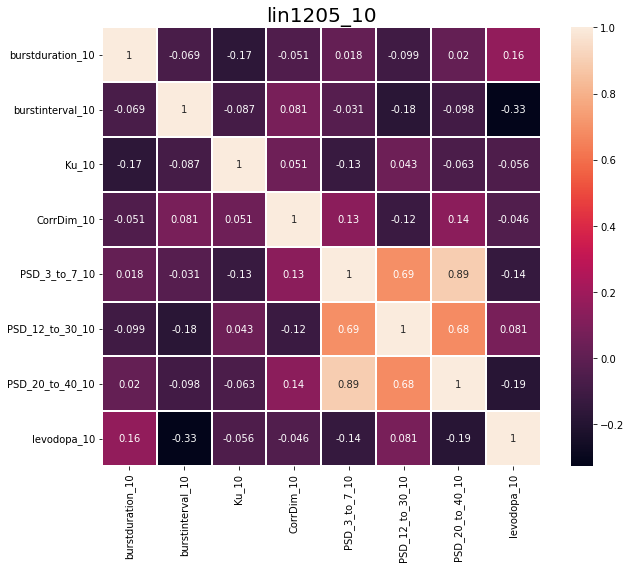

<Figure size 432x288 with 0 Axes>

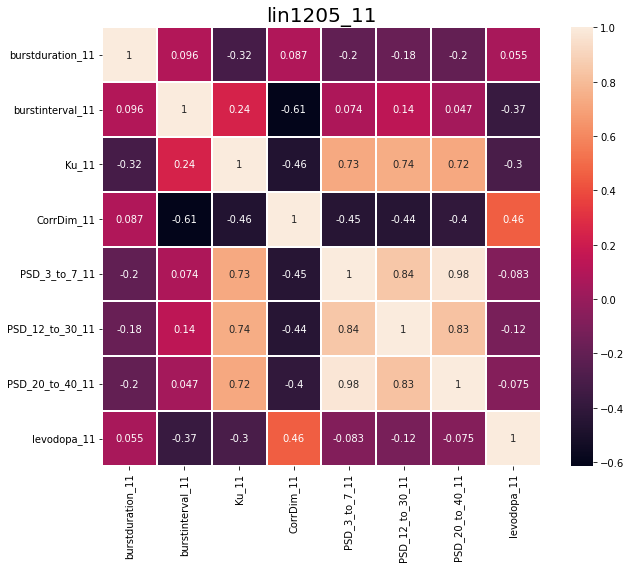

<Figure size 432x288 with 0 Axes>

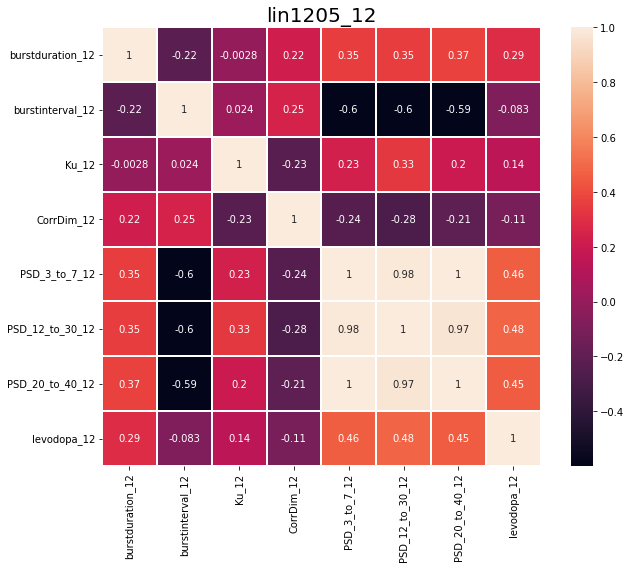

<Figure size 432x288 with 0 Axes>

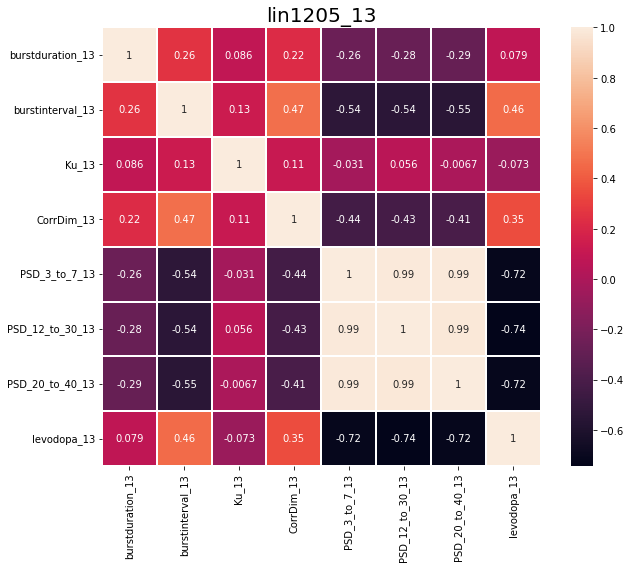

<Figure size 432x288 with 0 Axes>

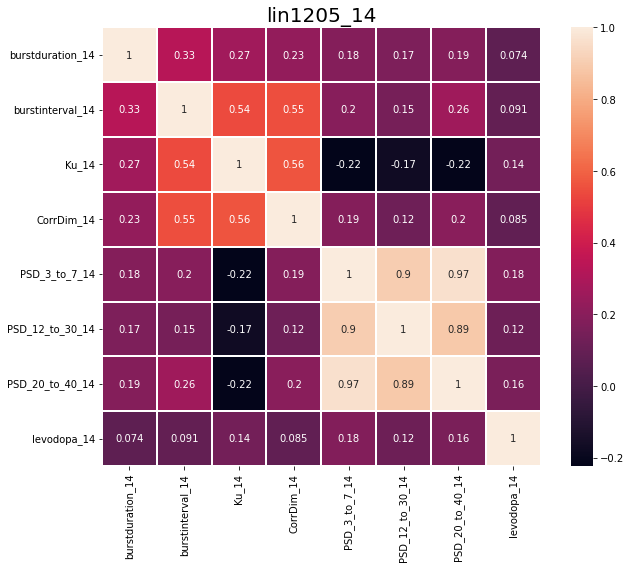

<Figure size 432x288 with 0 Axes>

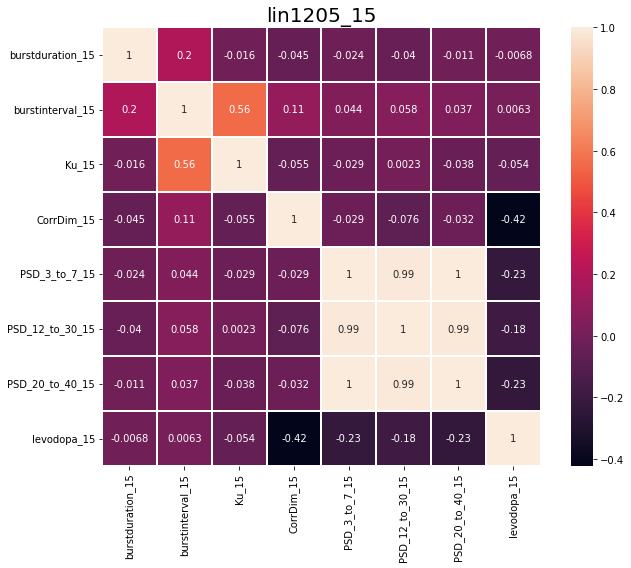

<Figure size 432x288 with 0 Axes>

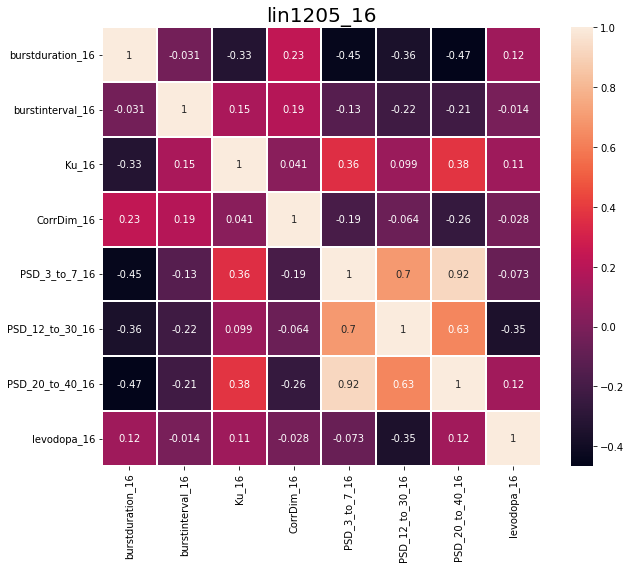

<Figure size 432x288 with 0 Axes>

In [21]:
D=[]

for filename in listdir(mypath): 
    fullpath = join(mypath,filename)
    D.append(getcorData(fullpath))
for i in range(16):
    Data= pd.DataFrame()
    for j in range(len(D)):
        Data=pd.concat([Data, D[j][i]], axis=0)
    corr_matrix = Data.corr()
    corr_matrix.to_csv(folder+'_'+str(i+1)+'.csv')
    plt.figure(figsize = (10,8))
    swarm_plot=sns.heatmap(corr_matrix,linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)
    fig = swarm_plot.get_figure()
    plt.title(patient+'_'+str(i+1), fontsize =20)
    fig.tight_layout()
    fig.savefig(folder+'_'+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
    plt.figure().clear()
    
    

# PCA

In [22]:
df= pd.DataFrame()

for filename in listdir(mypath):
    fullpath = join(mypath,filename)
    data=getData(fullpath)
    df=pd.concat([df, data], axis=0)

In [23]:
df

burstduration_1  burstinterval_1  kurtosis_1  CorrDim_1  \
test                                                                          
lin1205_teat108-10         0.403222         0.387200    8.819613   1.865041   
lin1205_teat108-1          0.682267         0.460413   16.725854   1.918462   
lin1205_teat108-2          0.341454         0.400275    8.683762   1.953559   
lin1205_teat108-3          0.444287         0.431877   11.449505   1.971523   
lin1205_teat108-4          0.355574         0.376421   11.744461   1.858548   
lin1205_teat108-5          0.288723         0.386861   13.105540   1.902983   
lin1205_teat108-6          0.790042         0.431386    9.692390   1.870766   
lin1205_teat108-7          0.420591         0.361292   14.319602   1.904152   
lin1205_teat108-8          0.430322         0.418829   10.275469   1.904318   
lin1205_teat108-9          0.467833         0.385950   10.978905   1.900337   
lin1205_teat17-10          0.347493         0.508746   10.622835   1.944235   
lin1205_teat17-1           0.429254         0.447478    6.461747   1.867726   
lin1205_teat17-2           0.233849         0.436446    6.565570   1.892231   
lin1205_teat17-3           0.416868         0.452115    7.585599   1.905470   
lin1205_teat17-4           0.345501         0.468452   10.476629   1.854602   
lin1205_teat17-5           0.419657         0.532605    9.150170   1.922954   
lin1205_teat17-6           0.461830         0.486976    8.148372   1.877431   
lin1205_teat17-7           0.237910         0.535941   11.297004   1.867519   
lin1205_teat17-8           0.402090         0.484142    9.250466   1.954342   
lin1205_teat17-9           0.403752         0.486016    8.312072   1.950657   
lin1205_teat20-10          0.547119         0.561334   12.698235   1.911013   
lin1205_teat20-1           0.700064         0.367083    7.026594   1.973581   
lin1205_teat20-2           0.353656         0.400589    7.514062   1.903391   
lin1205_teat20-3           0.484848         0.398206    7.535522   1.920996   
lin1205_teat20-4           0.734919         0.447102    6.913568   1.944280   
lin1205_teat20-5           0.302708         0.421538    7.092341   1.973745   
lin1205_teat20-6           0.231444         0.415464    6.619891   1.919725   
lin1205_teat20-7           0.365283         0.481604    9.019823   1.962553   
lin1205_teat20-8           0.246623         0.446187    8.682426   1.858926   
lin1205_teat20-9           0.304944         0.424366    8.008024   1.893788   
lin1205_teat54-10          0.269943         0.448510   12.078797   1.950978   
lin1205_teat54-1           0.516958         0.538898   13.744216   1.963002   
lin1205_teat54-2           0.314041         0.534629    9.737783   1.925371   
lin1205_teat54-3           0.501531         0.546032   14.647504   1.983558   
lin1205_teat54-4           0.371768         0.458095    8.411118   1.935843   
lin1205_teat54-5           0.287171         0.426863    8.583853   1.977914   
lin1205_teat54-6           0.332096         0.514626   14.523561   1.923072   
lin1205_teat54-7           0.351144         0.454938   12.062367   1.927234   
lin1205_teat54-8           0.387818         0.420833   10.126616   1.914598   
lin1205_teat54-9           0.377552         0.455686    8.403647   2.001045   
lin1205_teat72-10          0.441700         0.451409    9.550098   1.867543   
lin1205_teat72-1           0.458762         0.478372   11.233083   1.838577   
lin1205_teat72-2           0.565079         0.471122   10.805341   1.891340   
lin1205_teat72-3           0.398856         0.440544   10.205258   1.865045   
lin1205_teat72-4           0.470867         0.357189    7.972198   1.938961   
lin1205_teat72-5           0.565913         0.478881   11.201126   1.920048   
lin1205_teat72-6           0.323150         0.458338    8.652318   1.916603   
lin1205_teat72-7           0.412706         0.410205    8.470216   1.888186   
lin1205_teat72-8           0.302776         0.375842    8.378925   1.9

In [24]:
# 使用 scikit-learn 內建的 API 正規化
scaler = StandardScaler()
Z= scaler.fit_transform(df)  # 注意維度

In [25]:
df.iloc[:, :] = Z

# 印出正規化後的資料

In [26]:
df.head()

burstduration_1  burstinterval_1  kurtosis_1  CorrDim_1  \
test                                                                          
lin1205_teat108-10        -0.172961        -1.107665   -0.239431  -1.210389   
lin1205_teat108-1          2.131480        -0.040294    3.049794   0.157899   
lin1205_teat108-2         -0.683062        -0.917050   -0.295949   1.056849   
lin1205_teat108-3          0.166163        -0.456320    0.854680   1.516971   
lin1205_teat108-4         -0.566454        -1.264815    0.977390  -1.376692   

                    PSD_3_to_7_1  PSD_12_to_30_1  PSD_20_to_40_1  \
test                                                               
lin1205_teat108-10     -0.512285       -0.717730       -0.714818   
lin1205_teat108-1      -0.818402       -0.835477       -0.875823   
lin1205_teat108-2      -0.861844       -0.911346       -0.881007   
lin1205_teat108-3      -0.816598       -0.769125       -0.872523   
lin1205_teat108-4      -0.865101       -0.787972       -0.822731   

                    burstduration_2  burstinterval_2  kurtosis_2  ...  \
test                                                              ...   
lin1205_teat108-10        -0.430066         1.035714    0.338504  ...   
lin1205_teat108-1          0.183593        -0.415080   -0.420202  ...   
lin1205_teat108-2         -0.291802         0.810257    0.227537  ...   
lin1205_teat108-3          0.362742        -1.140683   -0.816479  ...   
lin1205_teat108-4         -0.275007         0.741024   -0.253268  ...   

                    PSD_3_to_7_15  PSD_12_to_30_15  PSD_20_to_40_15  \
test                                                                  
lin1205_teat108-10      -0.631607        -0.573688        -0.581905   
lin1205_teat108-1       -0.606419        -0.533008        -0.523717   
lin1205_teat108-2       -0.607554        -0.552185        -0.567490   
lin1205_teat108-3       -0.600257        -0.544990        -0.523453   
lin1205_teat108-4       -0.628063        -0.552730        -0.567453   

                    burstduration_16  burstinterval_16  kurtosis_16  \
test                                                                  
lin1205_teat108-10         -0.289298         -0.351180     0.356761   
lin1205_teat108-1          -0.812181         -0.206622    -1.098503   
lin1205_teat108-2          -0.696106         -0.730401     0.043278   
lin1205_teat108-3          -0.622379          1.541959    -0.022259   
lin1205_teat108-4          -1.140683          1.446121     0.970481   

                    CorrDim_16  PSD_3_to_7_16  PSD_12_to_30_16  \
test                                                             
lin1205_teat108-10    0.047747       0.074967        -0.134743   
lin1205_teat108-1    -1.575336       2.123542         0.465600   
lin1205_teat108-2     0.321163       2.658100         0.941440   
lin1205_teat108-3     0.338430       2.002282         0.565669   
lin1205_teat108-4    -0.474188       0.841869         0.719578   

                    PSD_20_to_40_16  
test                                 
lin1205_teat108-10        -0.276842  
lin1205_teat108-1          0.138191  
lin1205_teat108-2          0.414069  
lin1205_teat108-3         -0.038645  
lin1205_teat108-4         -0.012500  

[5 rows x 112 columns]

In [27]:
df_stats = df.describe().loc[['mean', 'std']]
df_stats.style.format("{:.2f}")

In [28]:
df.index

Index(['lin1205_teat108-10', 'lin1205_teat108-1', 'lin1205_teat108-2',
       'lin1205_teat108-3', 'lin1205_teat108-4', 'lin1205_teat108-5',
       'lin1205_teat108-6', 'lin1205_teat108-7', 'lin1205_teat108-8',
       'lin1205_teat108-9', 'lin1205_teat17-10', 'lin1205_teat17-1',
       'lin1205_teat17-2', 'lin1205_teat17-3', 'lin1205_teat17-4',
       'lin1205_teat17-5', 'lin1205_teat17-6', 'lin1205_teat17-7',
       'lin1205_teat17-8', 'lin1205_teat17-9', 'lin1205_teat20-10',
       'lin1205_teat20-1', 'lin1205_teat20-2', 'lin1205_teat20-3',
       'lin1205_teat20-4', 'lin1205_teat20-5', 'lin1205_teat20-6',
       'lin1205_teat20-7', 'lin1205_teat20-8', 'lin1205_teat20-9',
       'lin1205_teat54-10', 'lin1205_teat54-1', 'lin1205_teat54-2',
       'lin1205_teat54-3', 'lin1205_teat54-4', 'lin1205_teat54-5',
       'lin1205_teat54-6', 'lin1205_teat54-7', 'lin1205_teat54-8',
       'lin1205_teat54-9', 'lin1205_teat72-10', 'lin1205_teat72-1',
       'lin1205_teat72-2', 'lin1205_teat72-3', 

# 取得按照時間順序排列的資料

In [29]:
lo=[]
for j in range(len(test)):
    lo.append([])
for i in range(len(df.index)):    
    for j in range(len(test)):
            if((testname+test[j]) in df.index[i]):
                    lo[j].append(i)


In [30]:
lo

[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

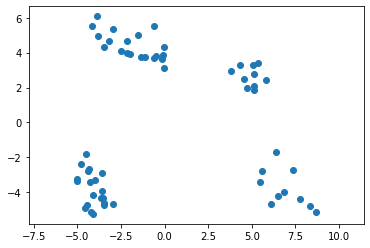

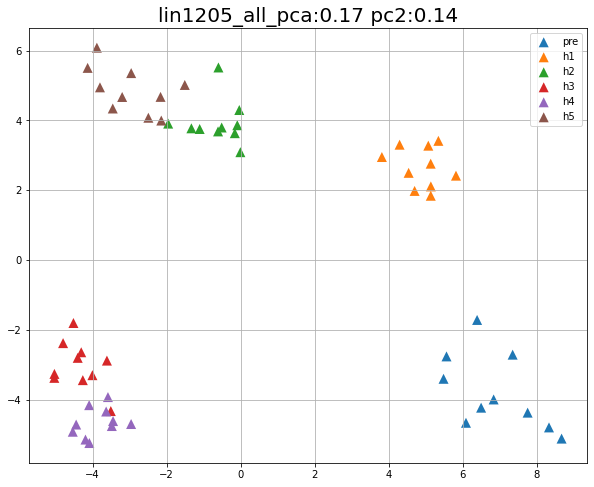

<Figure size 432x288 with 0 Axes>

In [31]:
"""
透過 scikit-learn 將數據降到 2 維
"""
# 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
# 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
n_components = 2
random_state = 9527

pca = PCA(n_components=n_components, 
          random_state=random_state)

# 注意我們是對正規化後的特徵 Z 做 PCA
L = pca.fit_transform(Z)  # (n_samples, n_components)

# 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸
plt.scatter(L[:, 0], L[:, 1])
plt.axis('equal');
# 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸，依照不同時間段資料點顏色不同
fig, ax = plt.subplots(figsize=(10,8))

for i in range(len(lo)):
    ax.scatter(L[lo[i],0], L[lo[i],1], label=label[i],marker ="^",
                edgecolors='none',s=100)

eig=np.round(pca.explained_variance_ratio_, 2)

plt.title(patient+'_all_pca:'+str(eig[0])+' pc2:'+str(eig[1]), fontsize =20)

ax.legend()
ax.grid(True)

plt.show()
fig.savefig(folder+'_all_pca'+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
plt.figure().clear()

In [32]:
"""
解析數據的前兩大主成份所代表的意涵。
顏色越突出代表其絕對值越大
"""
pcs = np.array(pca.components_) # (n_comp, n_features)

df_pc = pd.DataFrame(pcs, columns=df.columns[:])
df_pc.index = [f"第{c}主成分" for c in['一', '二']]
df_pc.style\
    .background_gradient(cmap='bwr_r', axis=None)\
    .format("{:.2}")
df_pc.to_csv(folder+'_pc_all'+'.csv', index=False)

# 每一頻道全部指標的PCA

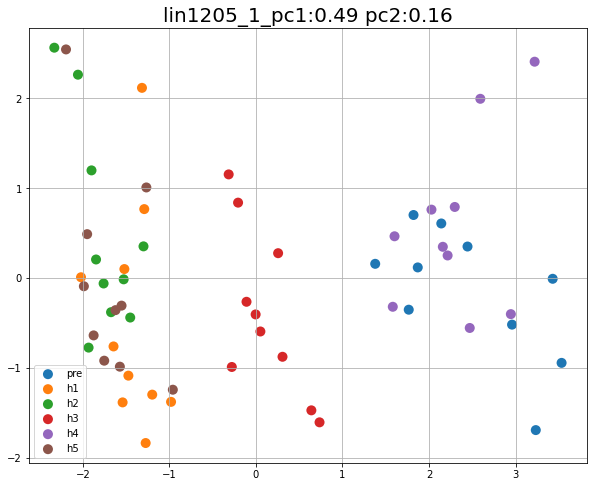

<Figure size 432x288 with 0 Axes>

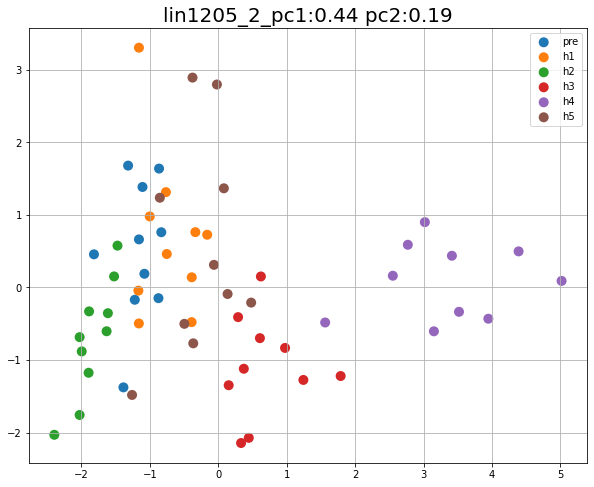

<Figure size 432x288 with 0 Axes>

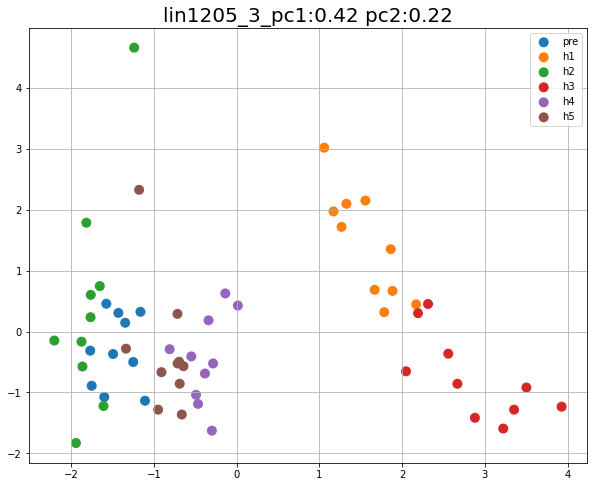

<Figure size 432x288 with 0 Axes>

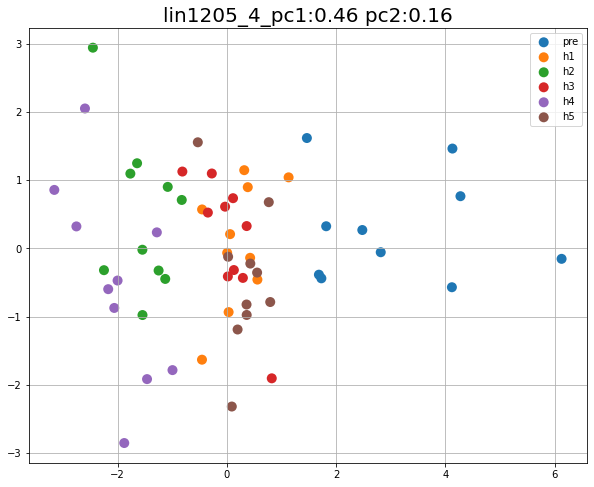

<Figure size 432x288 with 0 Axes>

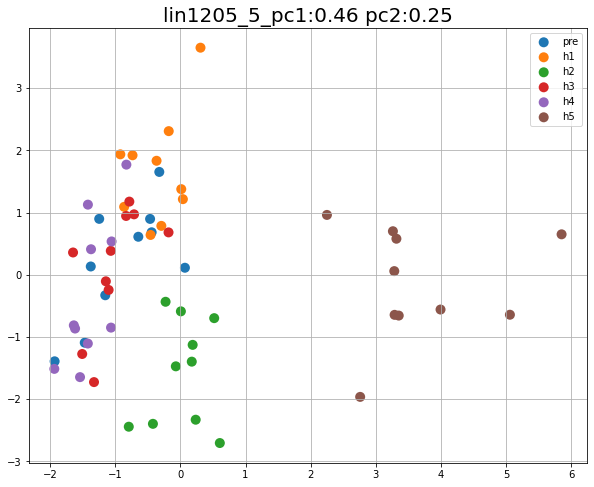

<Figure size 432x288 with 0 Axes>

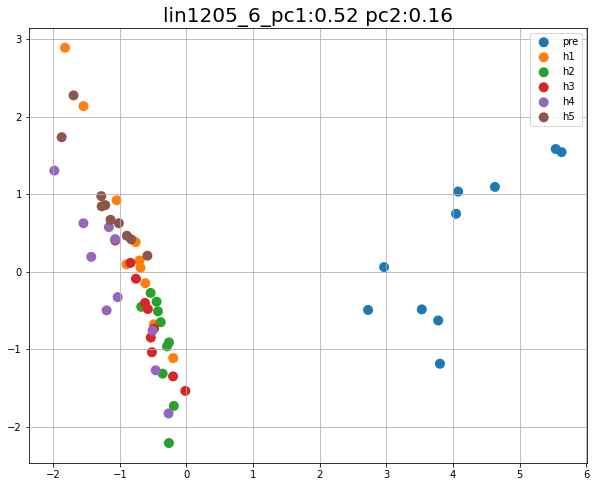

<Figure size 432x288 with 0 Axes>

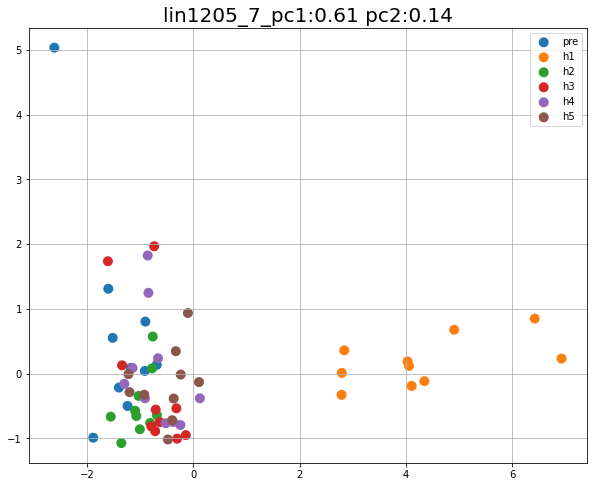

<Figure size 432x288 with 0 Axes>

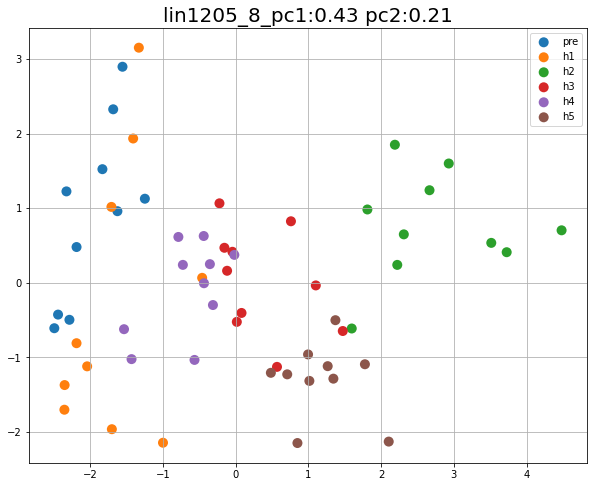

<Figure size 432x288 with 0 Axes>

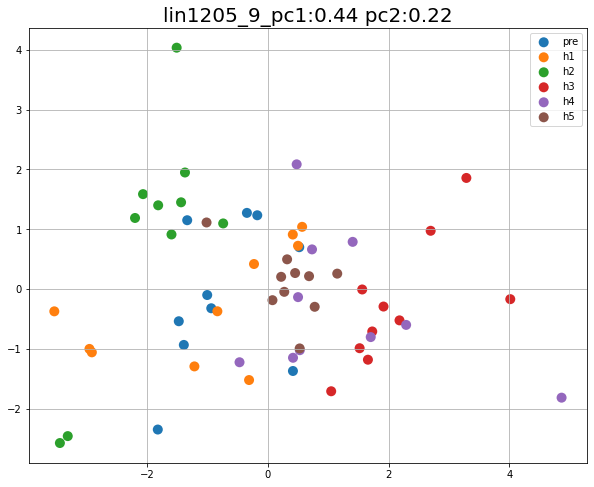

<Figure size 432x288 with 0 Axes>

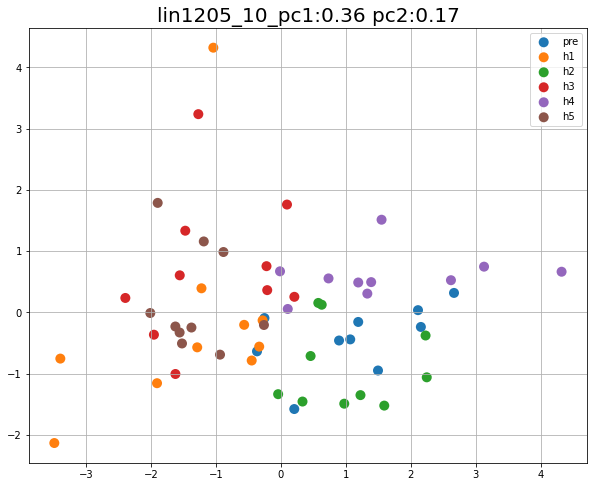

<Figure size 432x288 with 0 Axes>

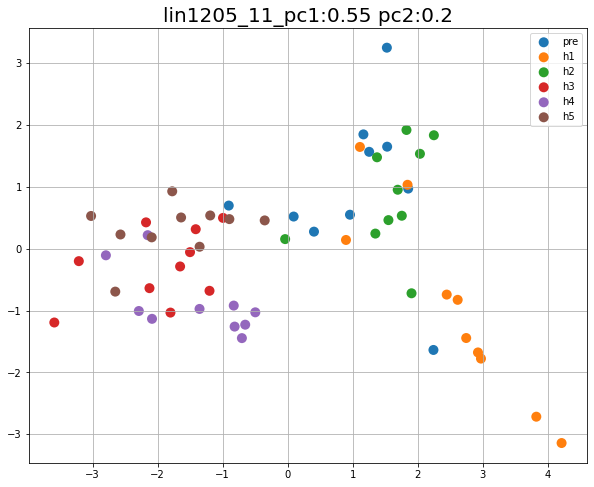

<Figure size 432x288 with 0 Axes>

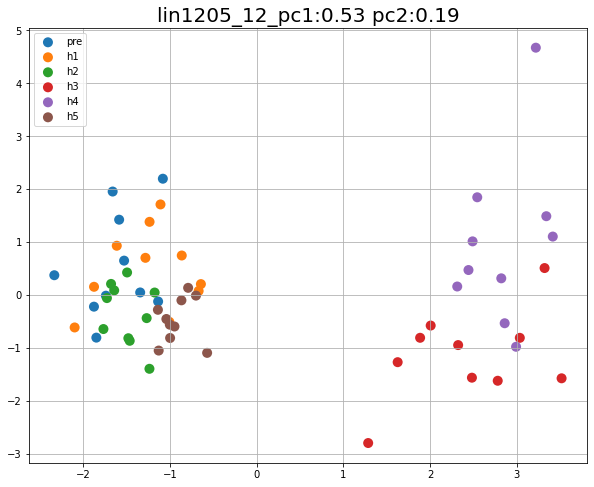

<Figure size 432x288 with 0 Axes>

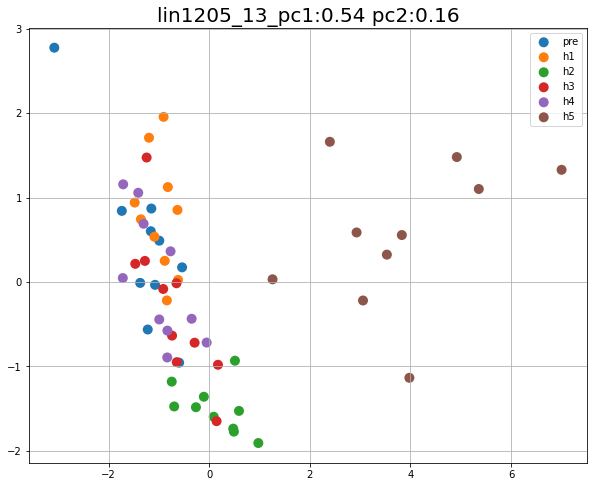

<Figure size 432x288 with 0 Axes>

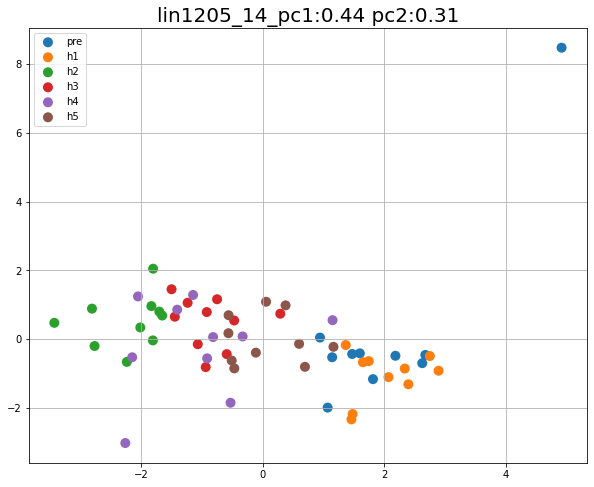

<Figure size 432x288 with 0 Axes>

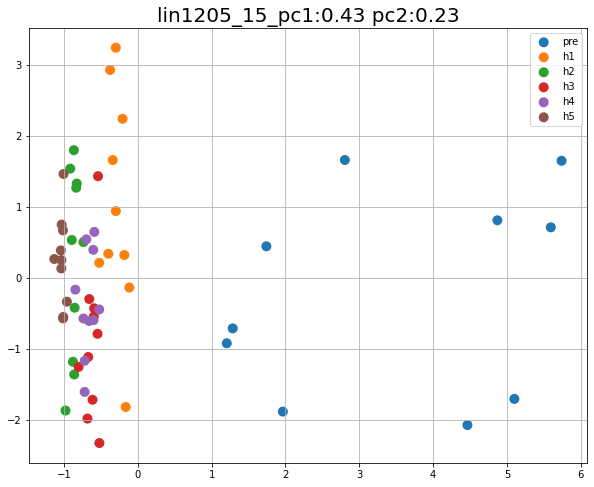

<Figure size 432x288 with 0 Axes>

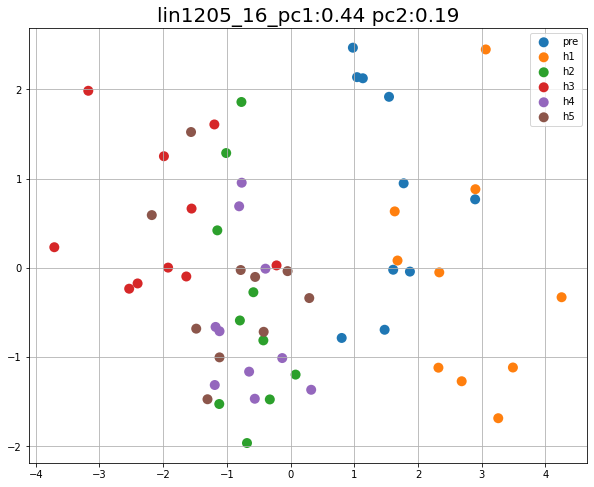

<Figure size 432x288 with 0 Axes>

In [33]:
import seaborn as sns
D=[]
for filename in listdir(mypath): 
    fullpath = join(mypath,filename)
    D.append(getsepData(fullpath))
for i in range(16):
    Data= pd.DataFrame()    
    for j in range(len(D)):
        Data=pd.concat([Data, D[j][i]], axis=0)   
    # 使用 scikit-learn 內建的 API 正規化
    scaler = StandardScaler()
    Z= scaler.fit_transform(Data)  # 注意維度
    
    # 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
    # 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
    n_components = 2
    random_state = 9527
    pca = PCA(n_components=n_components, 
              random_state=random_state)
    # 注意我們是對正規化後的特徵 Z 做 PCA
    L = pca.fit_transform(Z)  # (n_samples, n_components)

    # 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸
    fig, ax = plt.subplots(figsize=(10,8))
    for j in range(len(lo)):
        ax.scatter(L[lo[j],0], L[lo[j],1], label=label[j],
                    edgecolors='none',s=100)

    s=np.round(pca.explained_variance_ratio_, 2)
    plt.title(patient+'_'+str(i+1)+'_pc1:'+str(s[0])+' pc2:'+str(s[1]), fontsize =20)
    
    ax.legend()
    ax.grid(True)
    plt.show()
    pcs = np.array(pca.components_) # (n_comp, n_features)
    df_pc = pd.DataFrame(pcs, columns=Data.columns[:])
    df_pc.index = [f"{i+1}cha_{c}_component" for c in['one', 'second']]
    df_pc.style\
        #.background_gradient(cmap='bwr_r', axis=None)\
        #.format("{:.2}")
    df_pc.to_csv(folder+'_df'+str(i+1)+'.csv')
    
    fig.savefig(folder+'_pca'+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
    plt.figure().clear()

# pca_頻域指標

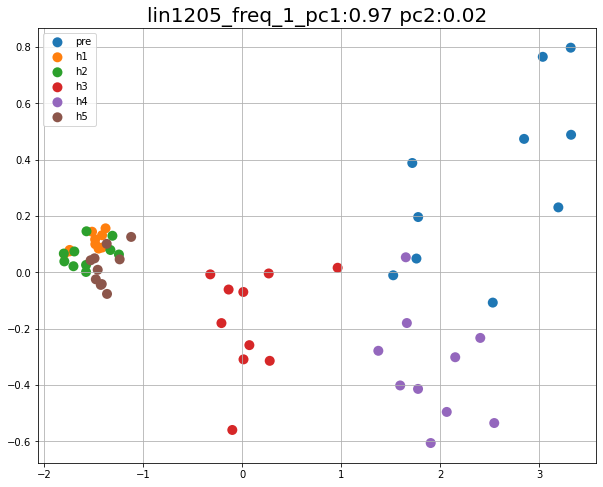

<Figure size 432x288 with 0 Axes>

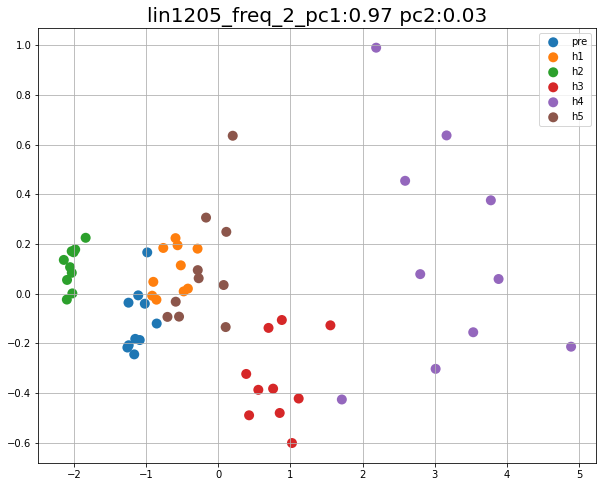

<Figure size 432x288 with 0 Axes>

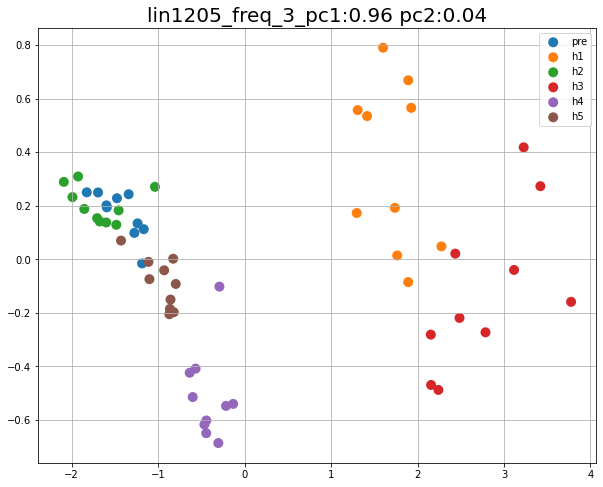

<Figure size 432x288 with 0 Axes>

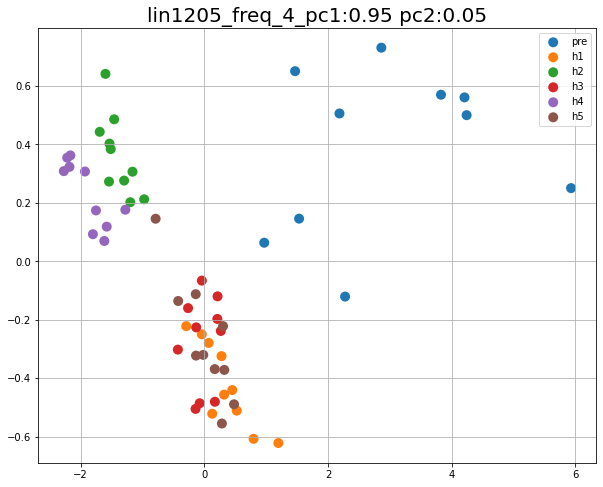

<Figure size 432x288 with 0 Axes>

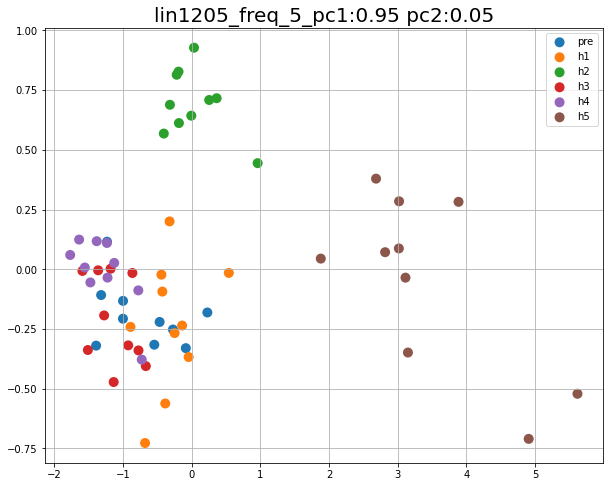

<Figure size 432x288 with 0 Axes>

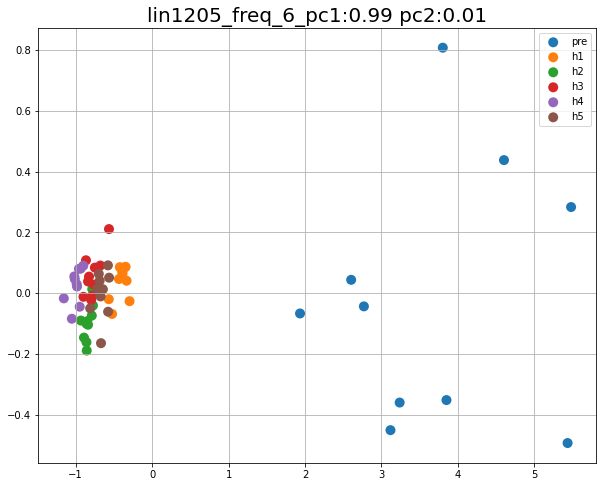

<Figure size 432x288 with 0 Axes>

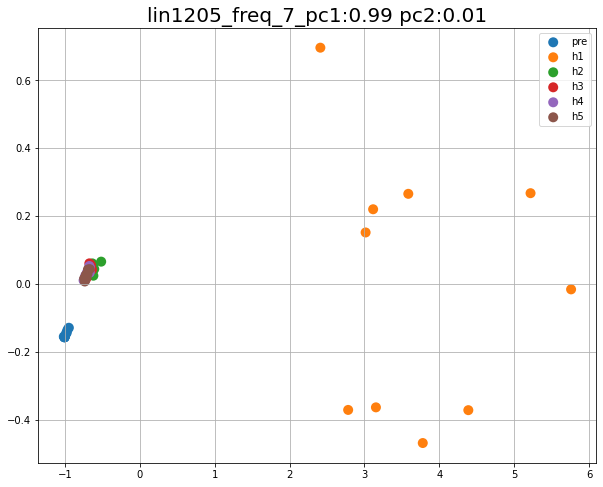

<Figure size 432x288 with 0 Axes>

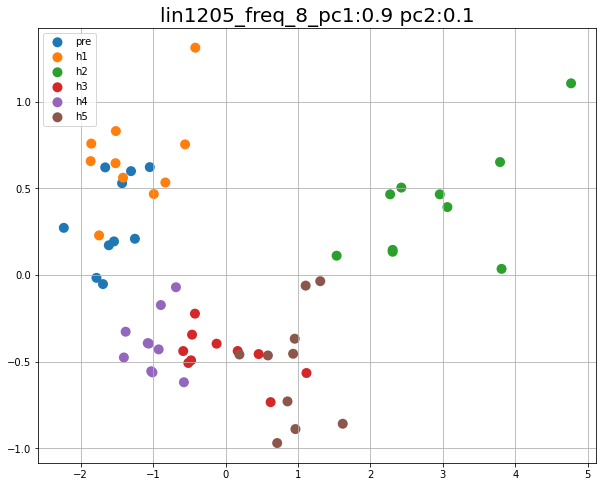

<Figure size 432x288 with 0 Axes>

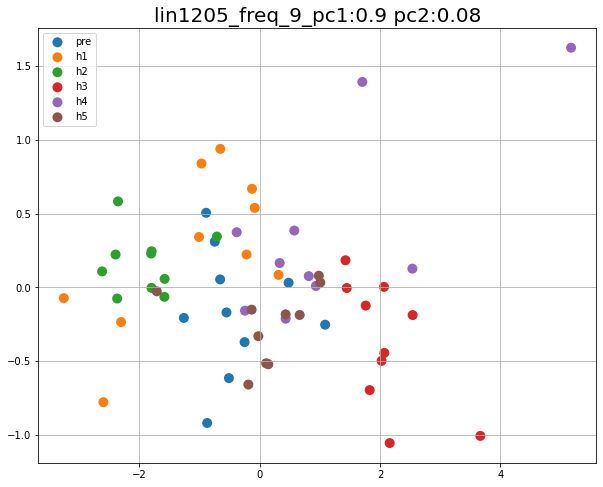

<Figure size 432x288 with 0 Axes>

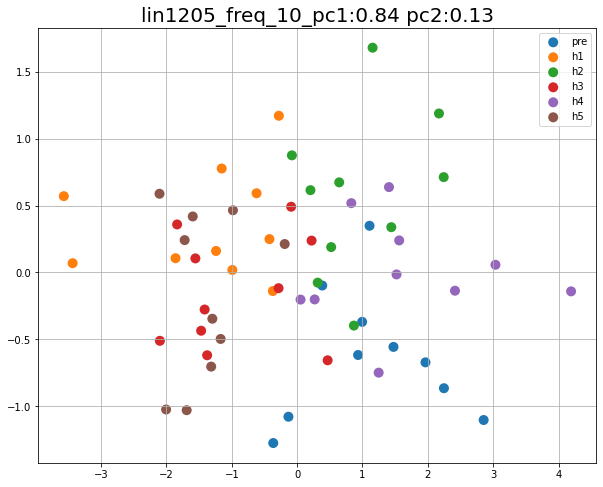

<Figure size 432x288 with 0 Axes>

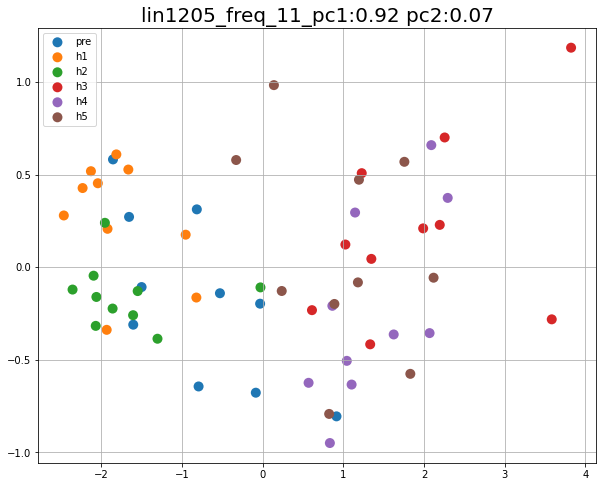

<Figure size 432x288 with 0 Axes>

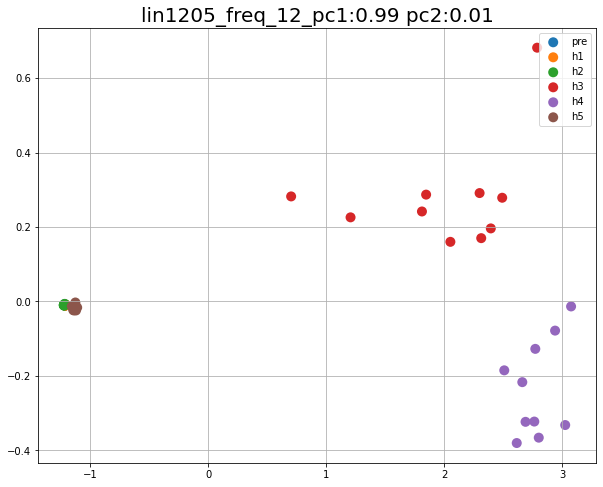

<Figure size 432x288 with 0 Axes>

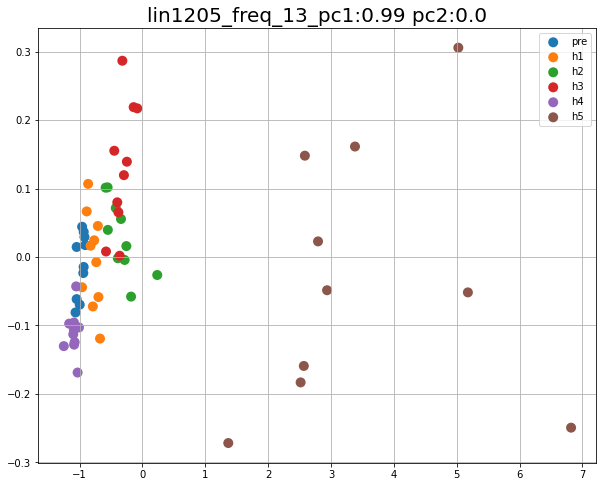

<Figure size 432x288 with 0 Axes>

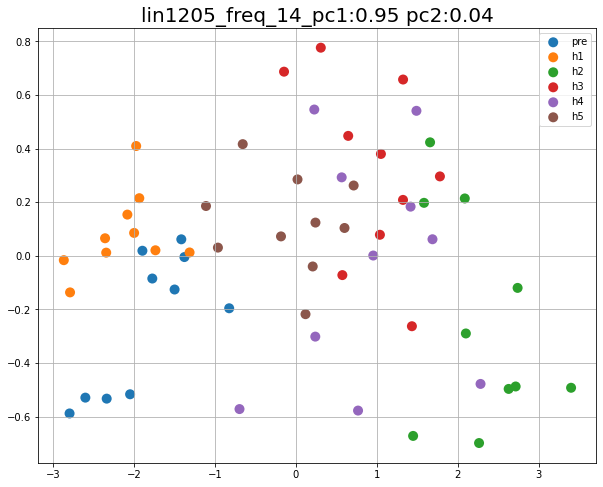

<Figure size 432x288 with 0 Axes>

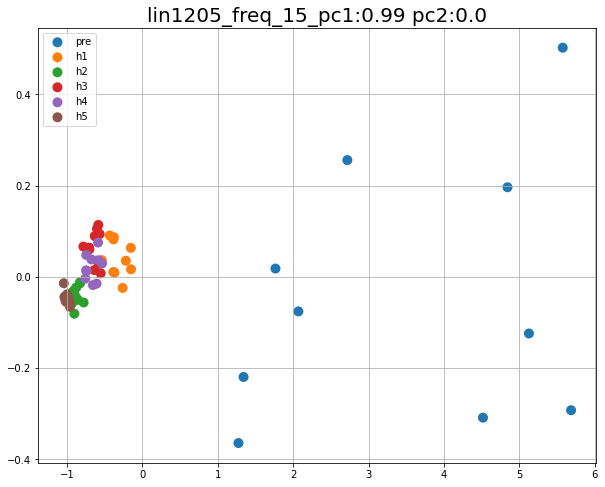

<Figure size 432x288 with 0 Axes>

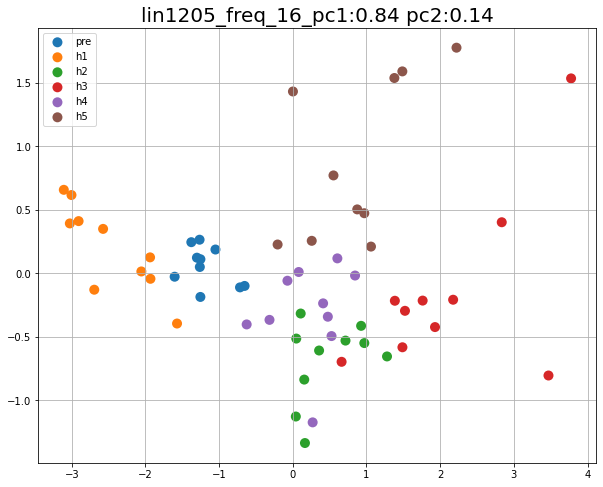

<Figure size 432x288 with 0 Axes>

In [34]:
import seaborn as sns

D=[]
for filename in listdir(mypath): 
    fullpath = join(mypath,filename)
    D.append(getsepDatafreq(fullpath))
for i in range(16):
    Data= pd.DataFrame()    
    for j in range(len(D)):
        Data=pd.concat([Data, D[j][i]], axis=0)   
    # 使用 scikit-learn 內建的 API 正規化
    scaler = StandardScaler()
    Z= scaler.fit_transform(Data)  # 注意維度
    
    # 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
    # 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
    n_components = 2
    random_state = 9527
    pca = PCA(n_components=n_components, 
              random_state=random_state)
    # 注意我們是對正規化後的特徵 Z 做 PCA
    L = pca.fit_transform(Z)  # (n_samples, n_components)

    # 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸

    fig, ax = plt.subplots(figsize=(10,8))
    for j in range(len(lo)):
        ax.scatter(L[lo[j],0], L[lo[j],1], label=label[j],
                    edgecolors='none',s=100)
    s=np.round(pca.explained_variance_ratio_, 2)

    plt.title(patient+'_freq_'+str(i+1)+'_pc1:'+str(s[0])+' pc2:'+str(s[1]), fontsize =20)
    
    ax.legend()
    ax.grid(True)
    plt.show()
    pcs = np.array(pca.components_) # (n_comp, n_features)

    df_pc = pd.DataFrame(pcs, columns=Data.columns[:])
    df_pc.index = [f"{i+1}cha_{c}_component" for c in['one', 'second']]
    df_pc.style\
        .background_gradient(cmap='bwr_r', axis=None)\
        .format("{:.2}")
    df_pc.to_csv(folder+'_freq_df'+str(i+1)+'.csv')
    fig.savefig(folder+'_freq_pca'+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
    plt.figure().clear()

# pca 時域指標

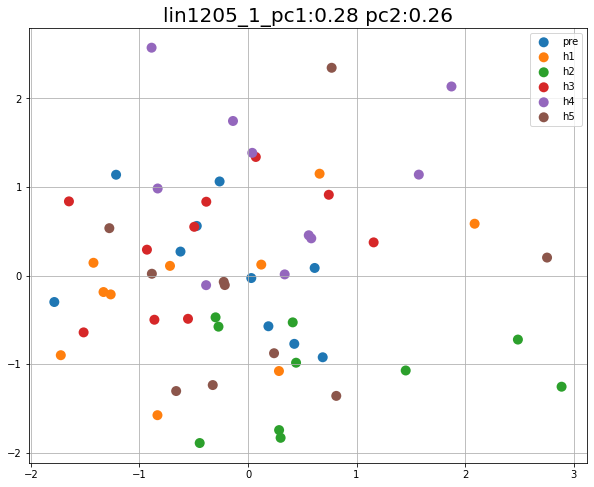

<Figure size 432x288 with 0 Axes>

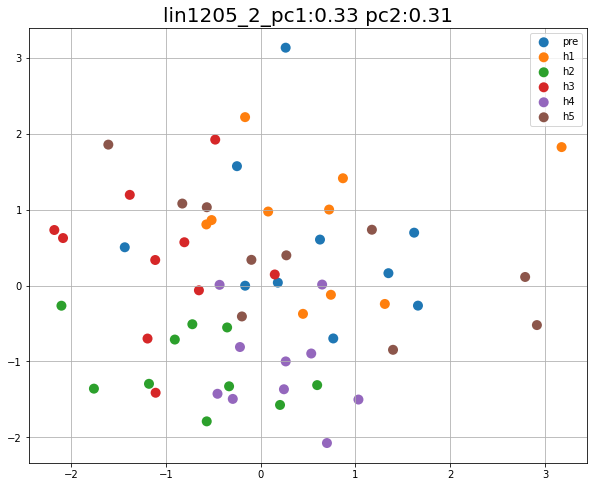

<Figure size 432x288 with 0 Axes>

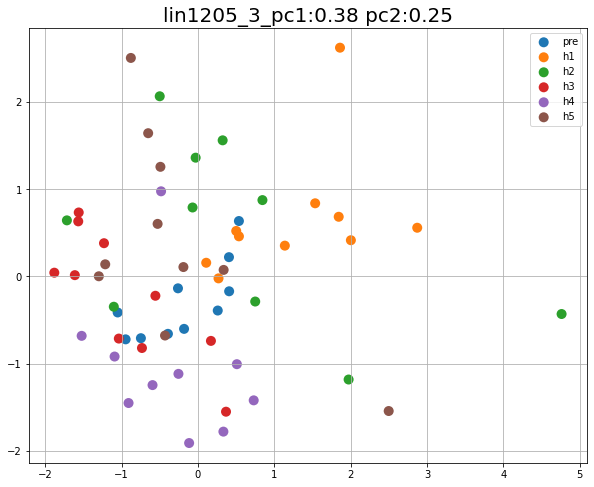

<Figure size 432x288 with 0 Axes>

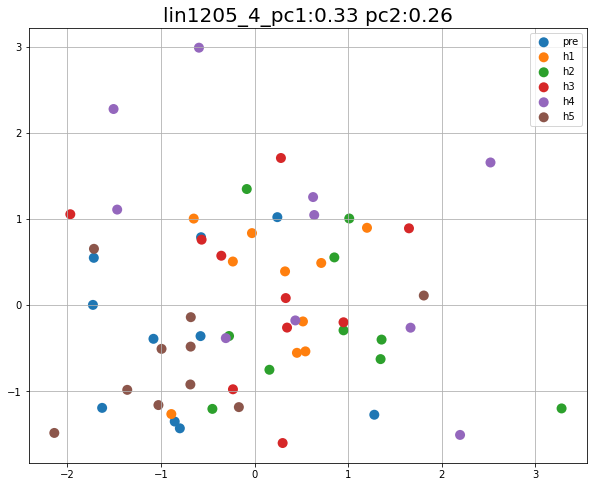

<Figure size 432x288 with 0 Axes>

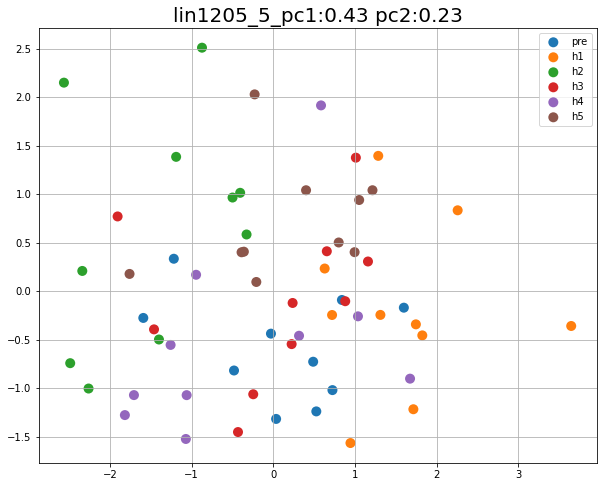

<Figure size 432x288 with 0 Axes>

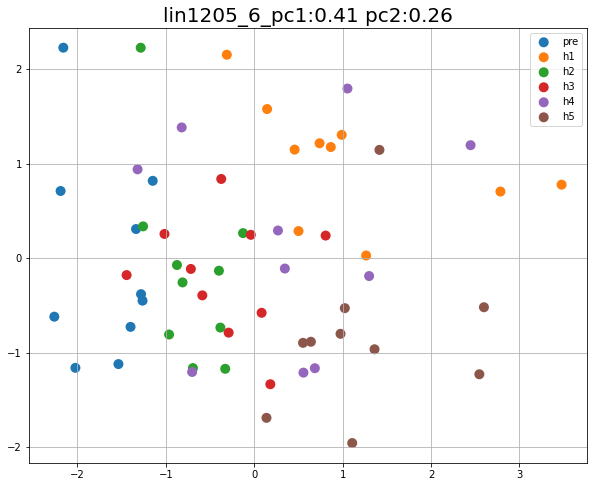

<Figure size 432x288 with 0 Axes>

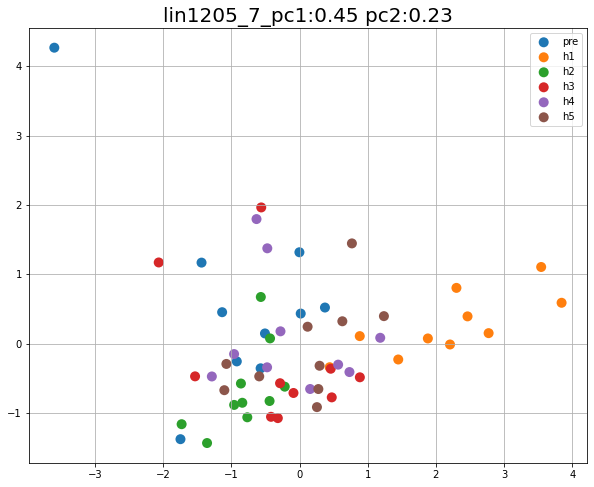

<Figure size 432x288 with 0 Axes>

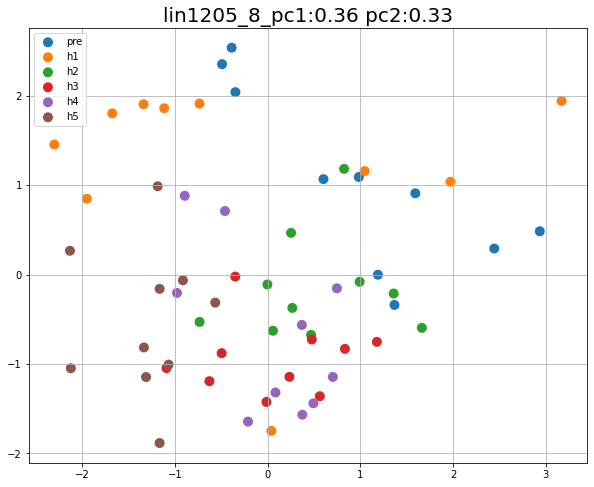

<Figure size 432x288 with 0 Axes>

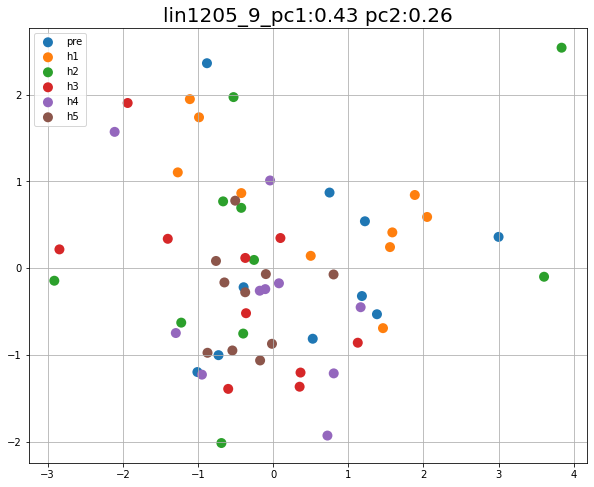

<Figure size 432x288 with 0 Axes>

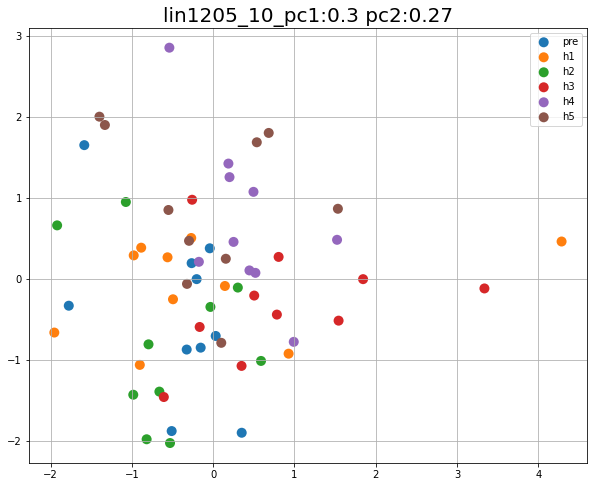

<Figure size 432x288 with 0 Axes>

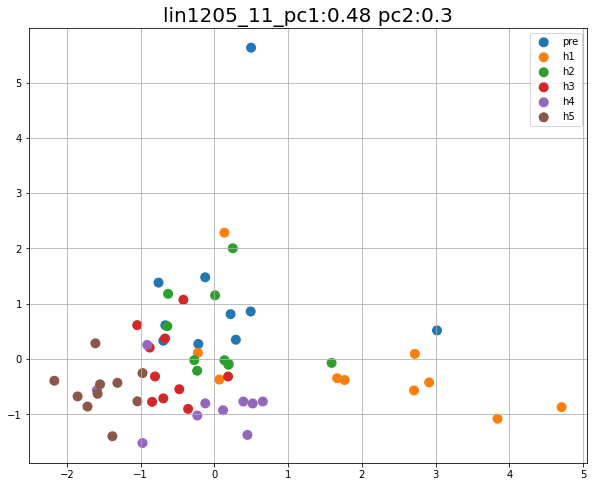

<Figure size 432x288 with 0 Axes>

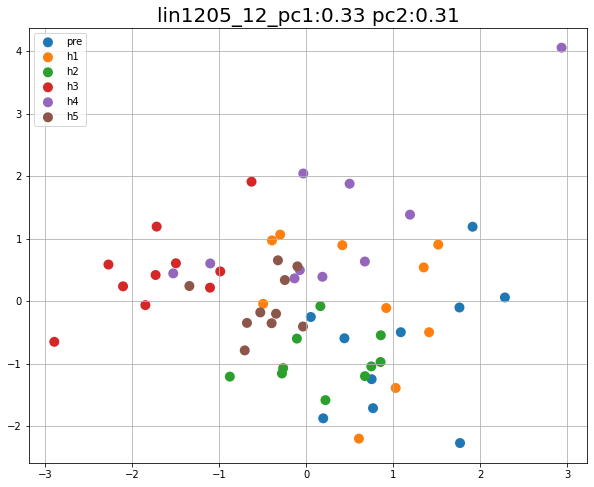

<Figure size 432x288 with 0 Axes>

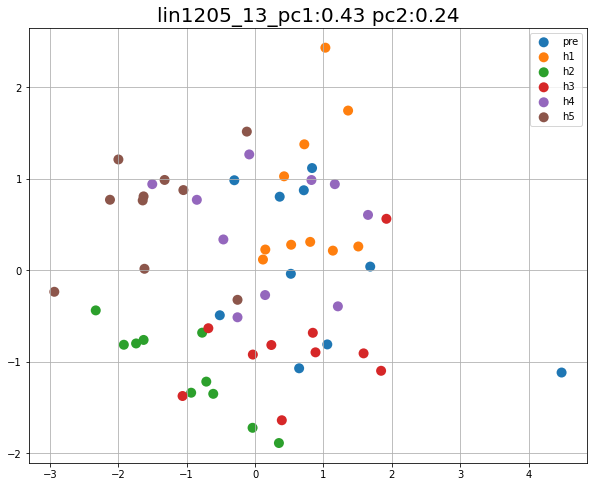

<Figure size 432x288 with 0 Axes>

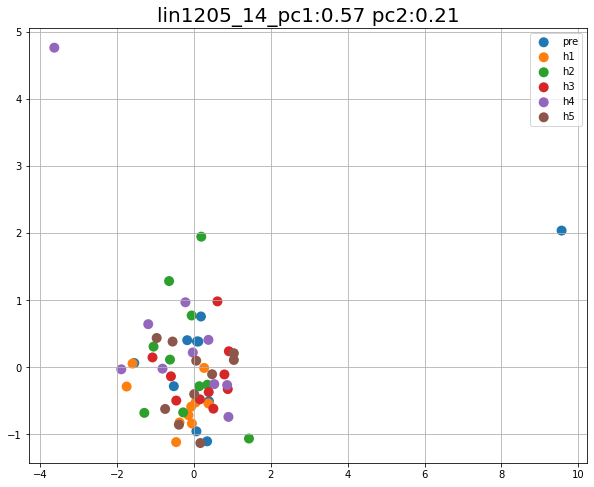

<Figure size 432x288 with 0 Axes>

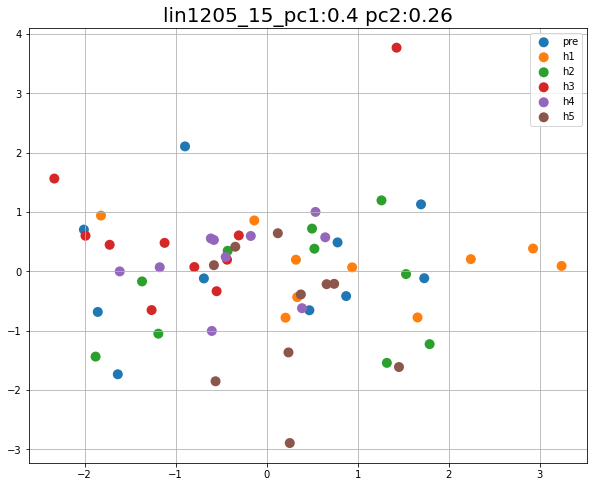

<Figure size 432x288 with 0 Axes>

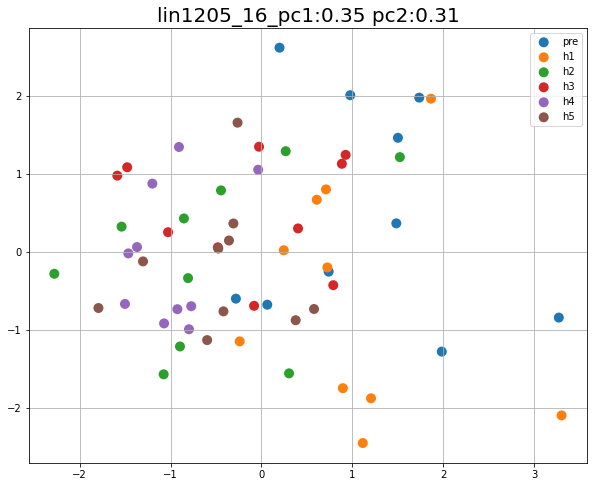

<Figure size 432x288 with 0 Axes>

In [35]:
import seaborn as sns
D=[]
for filename in listdir(mypath): 
    fullpath = join(mypath,filename)
    D.append(getsepDatatime(fullpath))
for i in range(16):
    Data= pd.DataFrame()    
    for j in range(len(D)):
        Data=pd.concat([Data, D[j][i]], axis=0)   
        # 使用 scikit-learn 內建的 API 正規化
    scaler = StandardScaler()
    Z= scaler.fit_transform(Data)  # 注意維度
    
    # 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
    # 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
    n_components = 2
    random_state = 9527
    pca = PCA(n_components=n_components, 
              random_state=random_state)
    # 注意我們是對正規化後的特徵 Z 做 PCA
    L = pca.fit_transform(Z)  # (n_samples, n_components)

    # 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸
    fig, ax = plt.subplots(figsize=(10,8))

    for j in range(len(lo)):
        ax.scatter(L[lo[j],0], L[lo[j],1],  label=label[j],
                    edgecolors='none',s=100)
    s=np.round(pca.explained_variance_ratio_, 2)

    plt.title(patient+'_'+str(i+1)+'_pc1:'+str(s[0])+' pc2:'+str(s[1]), fontsize =20)
    
    ax.legend()
    ax.grid(True)
    plt.show()
    pcs = np.array(pca.components_) # (n_comp, n_features)

    df_pc = pd.DataFrame(pcs, columns=Data.columns[:])
    df_pc.index = [f"{i+1}cha_{c}_component" for c in['one', 'second']]
    df_pc.style\
        .background_gradient(cmap='bwr_r', axis=None)\
        .format("{:.2}")
    df_pc.to_csv(folder+'_time_df'+str(i+1)+'.csv')
    fig.savefig(folder+'_time_pca'+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
    plt.figure().clear()

# 將多個csv檔案合併成一個檔案

In [36]:
import csv
from pathlib import Path
# 讀入檔案
rows =[]
# 最初讀入時，header也要讀入
for file in Path(patient).glob("*.csv"):
    if(file==(folder+patient+'_df.csv')):
        continue
    f = open(file)
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
    rows.append([''])
    f.close()
for folder, subfolders, files in os.walk(patient+'/'):        
    for file in files:        
        # checking if file is 
        # of .csv type 
        if file.endswith('.csv'): 
            path = os.path.join(folder, file) 
                
            # deleting the csv file 
            os.remove(path)
# 寫入檔案
f = open(folder+patient+'_df.csv',mode='w', newline="")
writer = csv.writer(f)
for row in rows:
    writer.writerow(row)
f.close()

# barchart

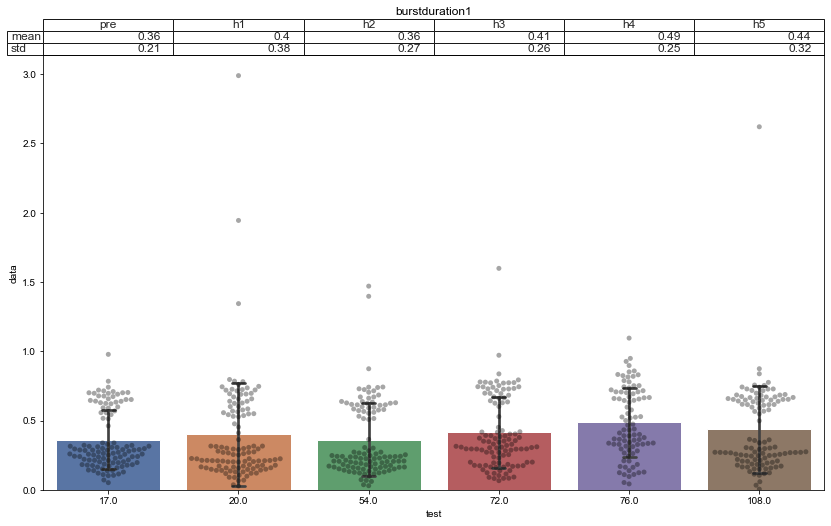

<Figure size 432x288 with 0 Axes>

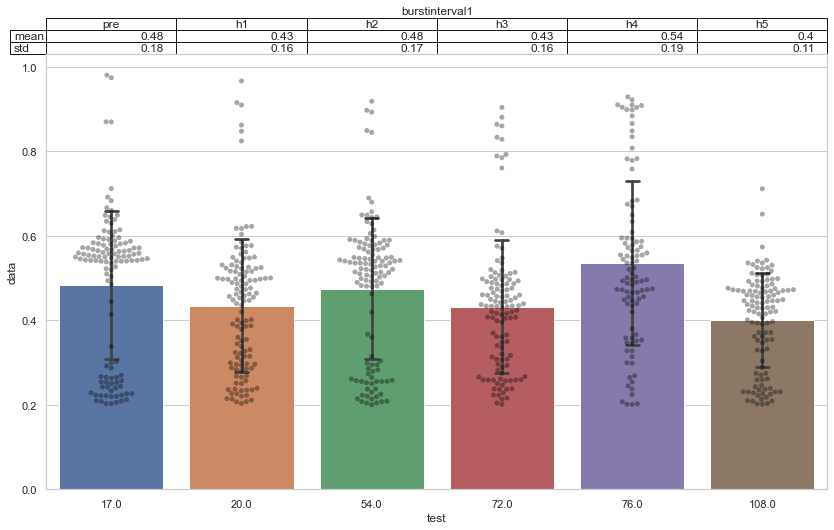

<Figure size 432x288 with 0 Axes>

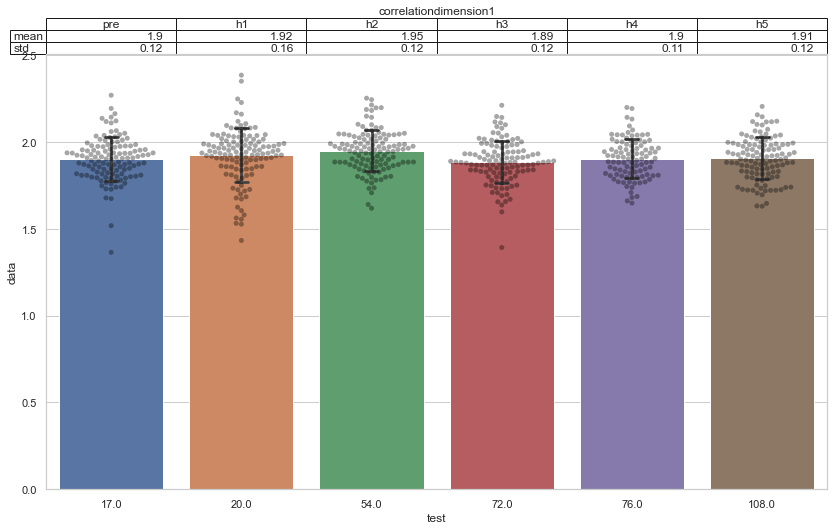

<Figure size 432x288 with 0 Axes>

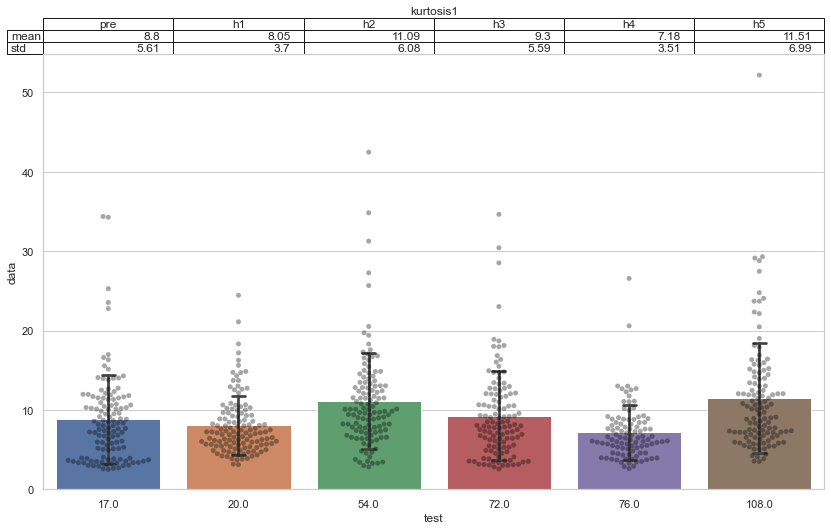

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

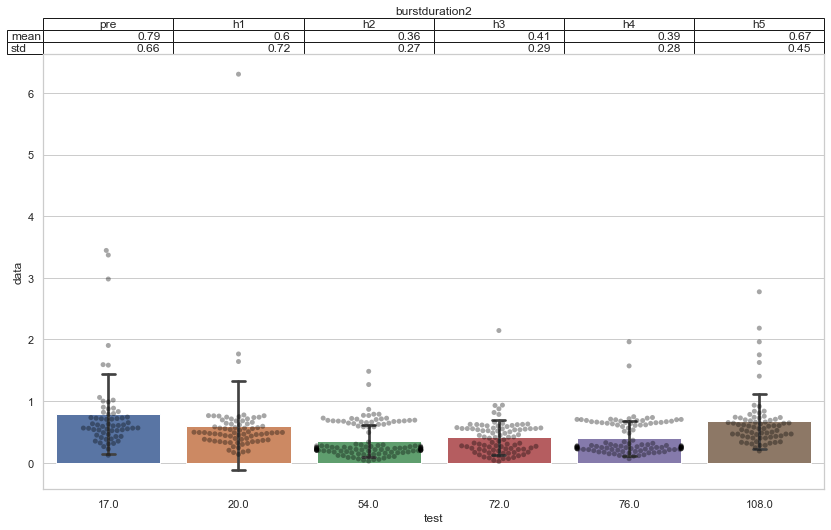

<Figure size 432x288 with 0 Axes>

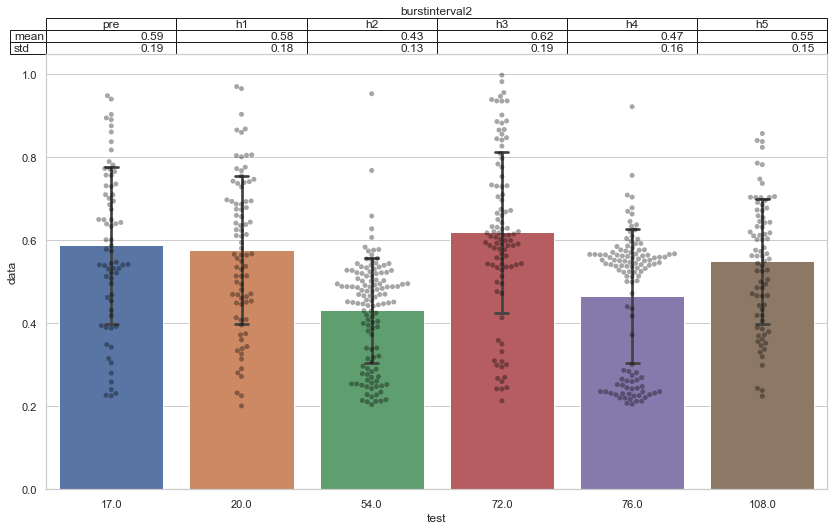

<Figure size 432x288 with 0 Axes>

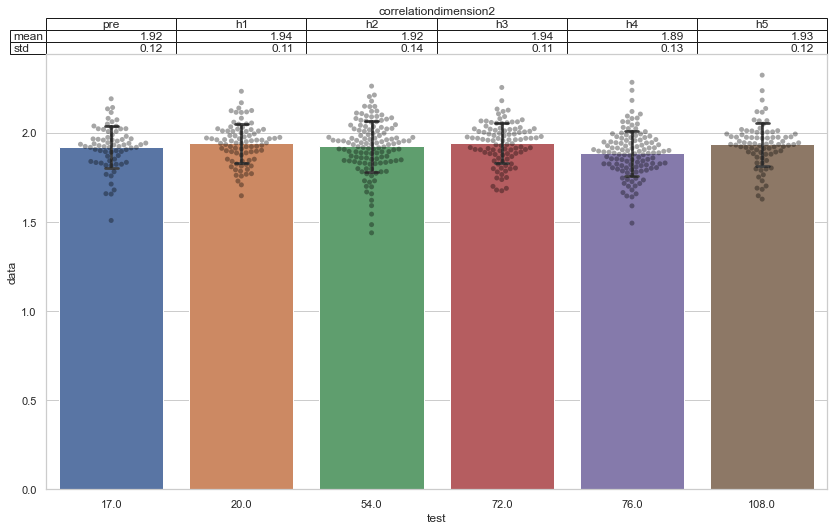

<Figure size 432x288 with 0 Axes>

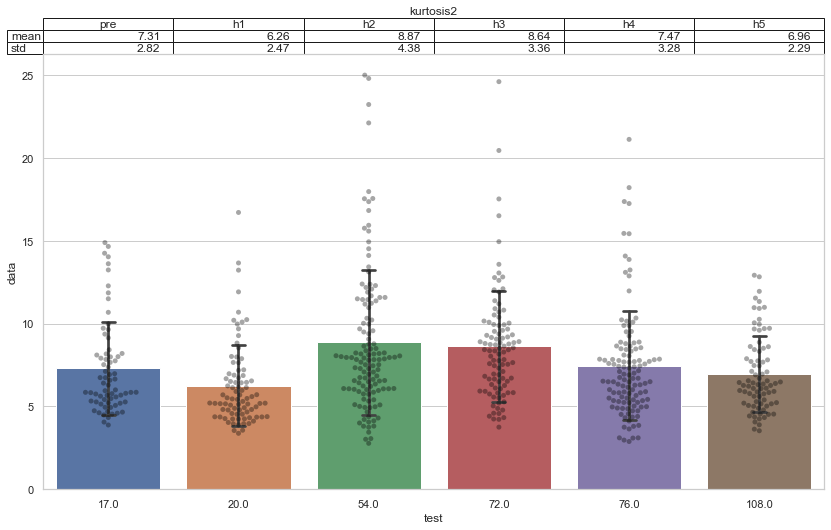

<Figure size 432x288 with 0 Axes>

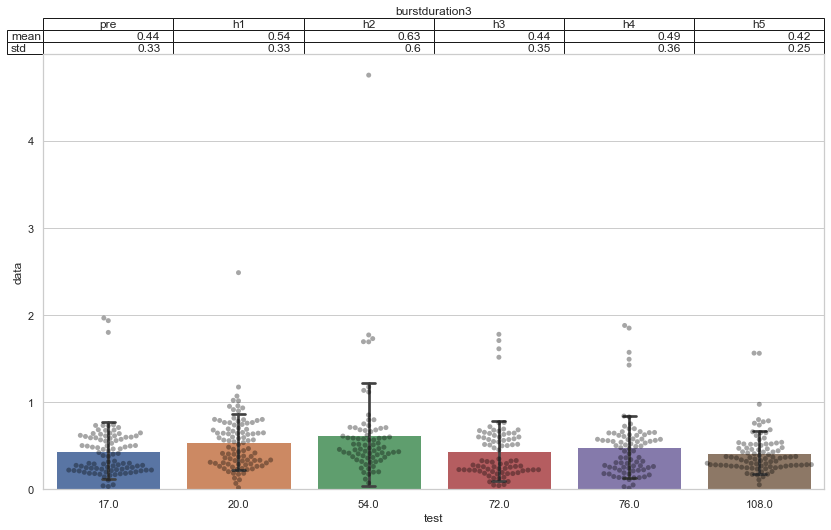

<Figure size 432x288 with 0 Axes>

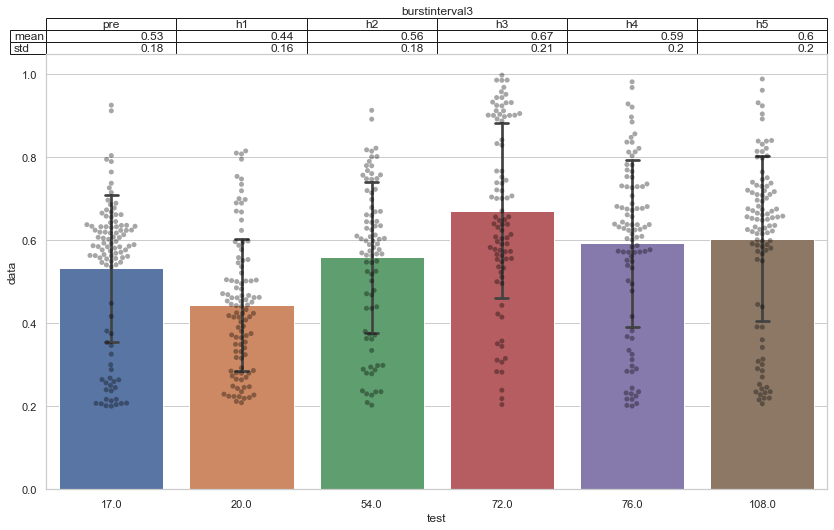

<Figure size 432x288 with 0 Axes>

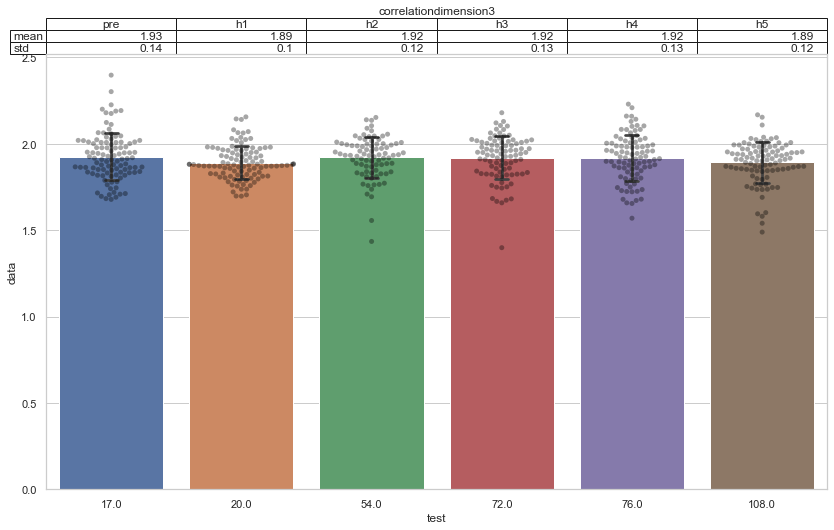

<Figure size 432x288 with 0 Axes>

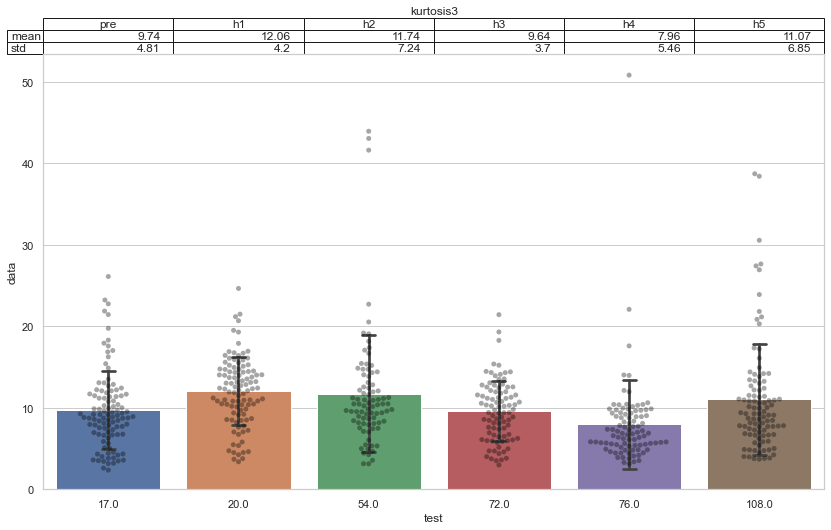

<Figure size 432x288 with 0 Axes>

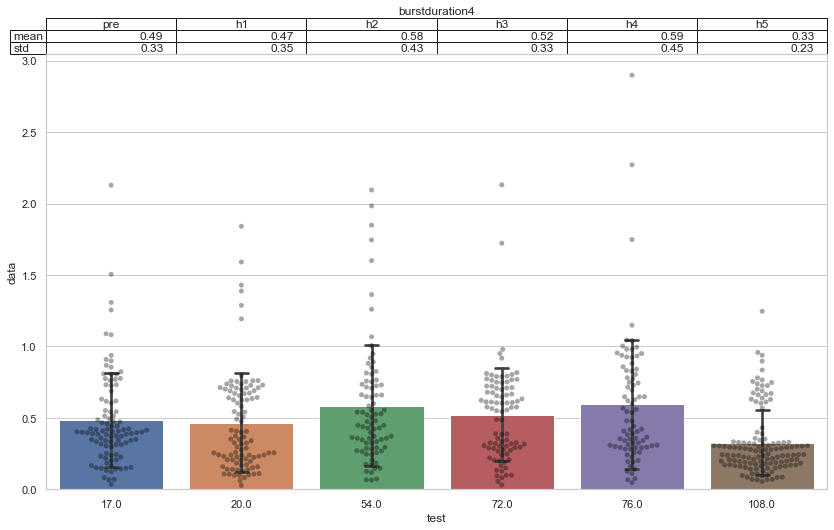

<Figure size 432x288 with 0 Axes>

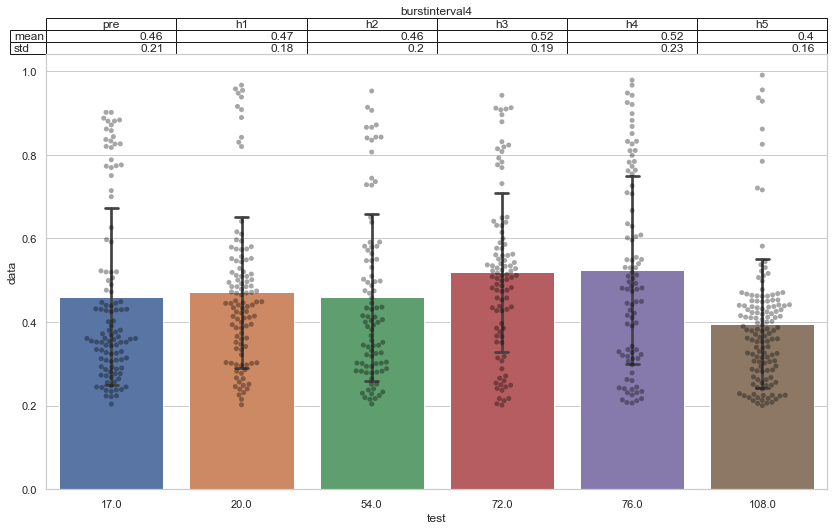

<Figure size 432x288 with 0 Axes>

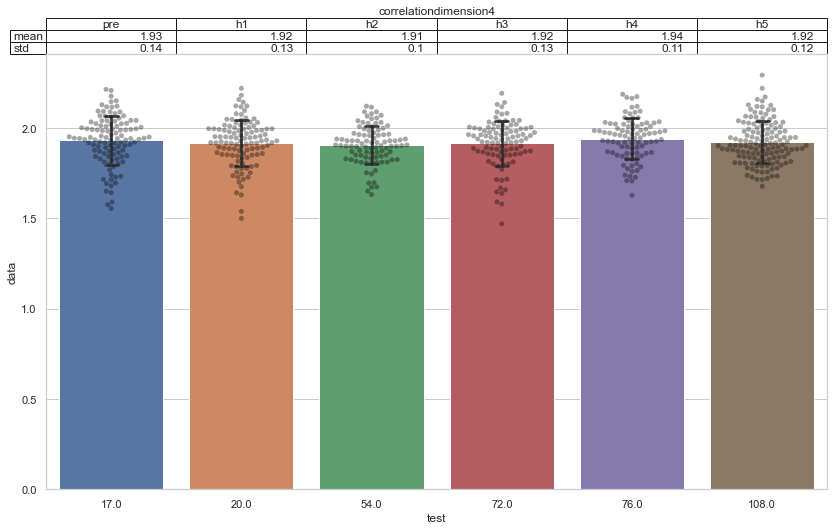

<Figure size 432x288 with 0 Axes>

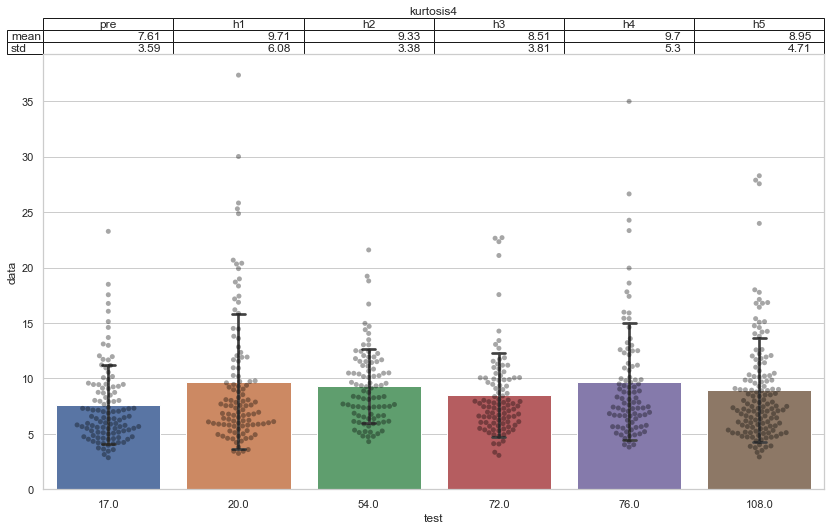

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

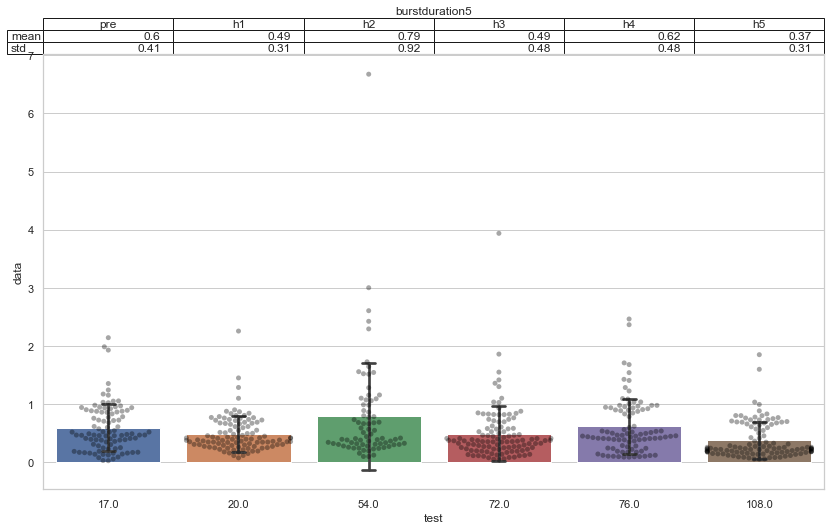

<Figure size 432x288 with 0 Axes>

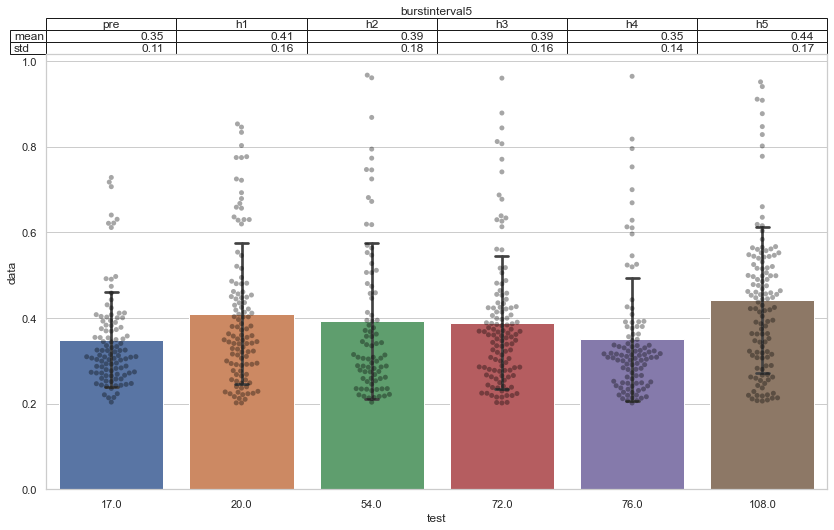

<Figure size 432x288 with 0 Axes>

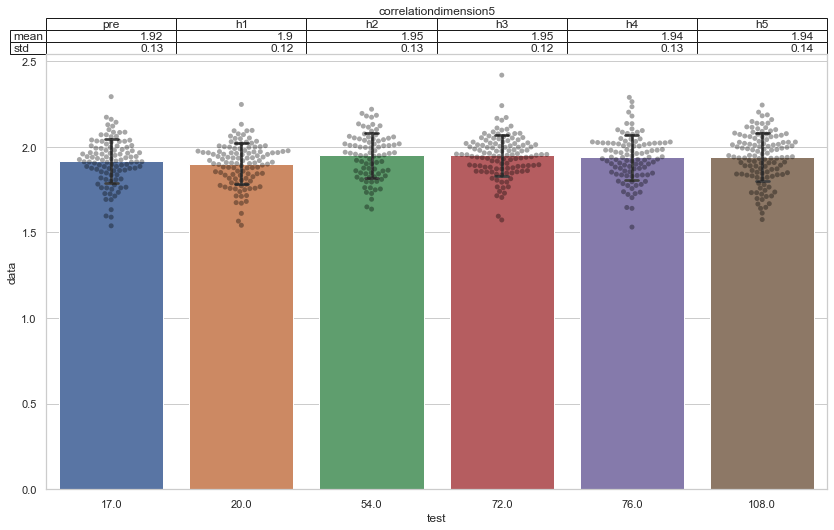

<Figure size 432x288 with 0 Axes>

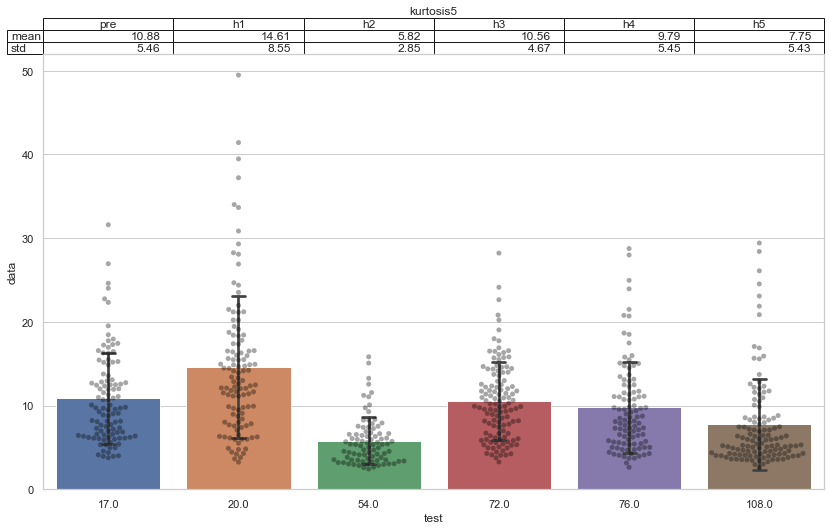

<Figure size 432x288 with 0 Axes>

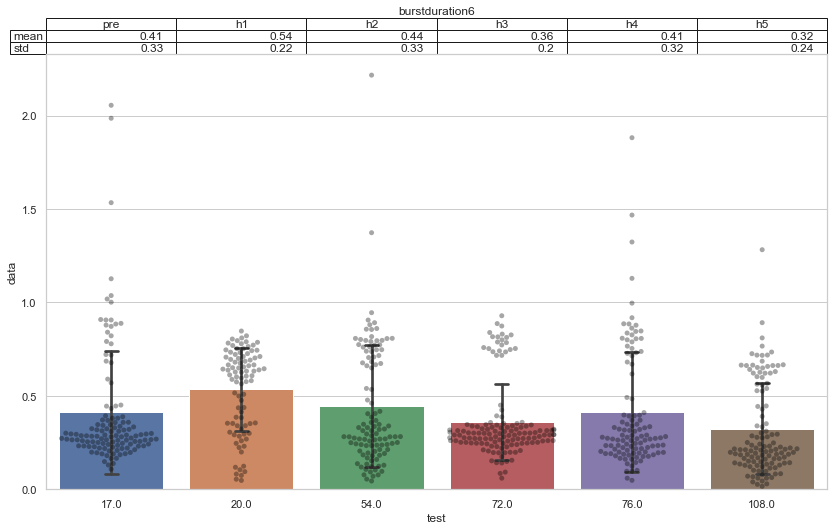

<Figure size 432x288 with 0 Axes>

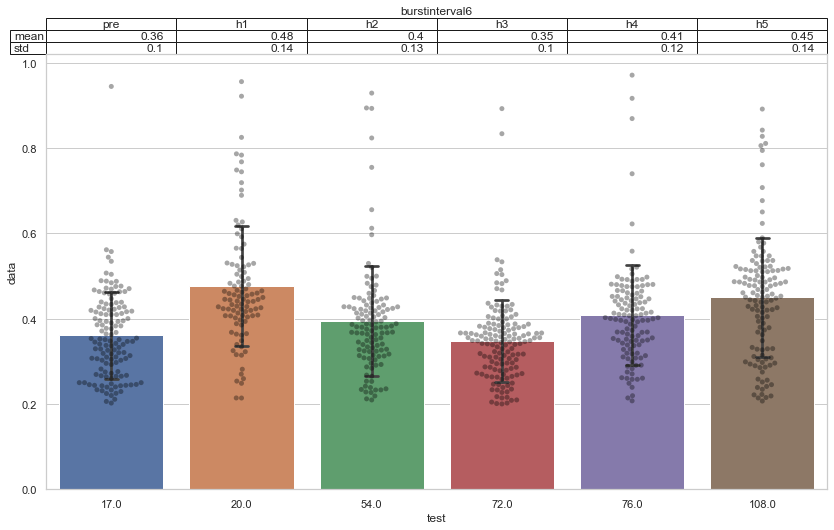

<Figure size 432x288 with 0 Axes>

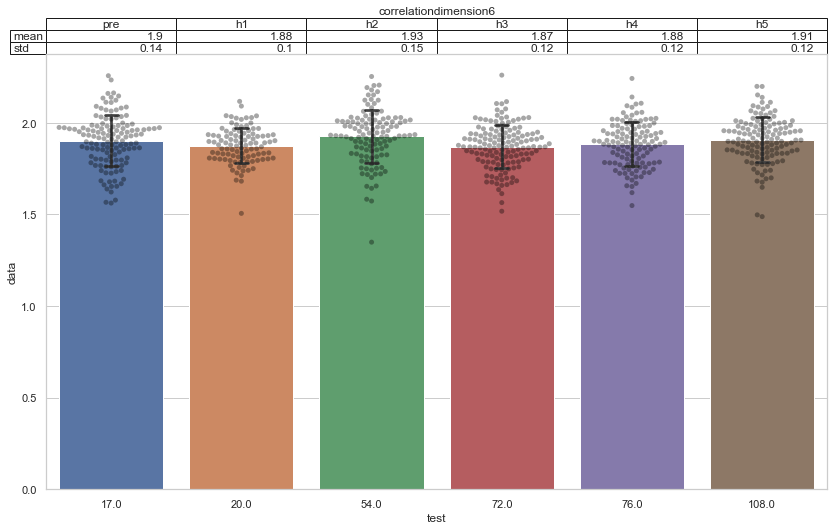

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

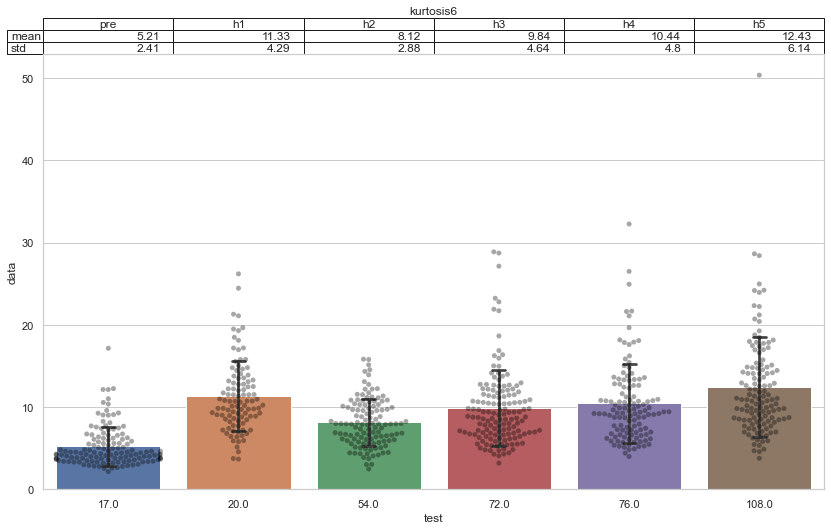

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

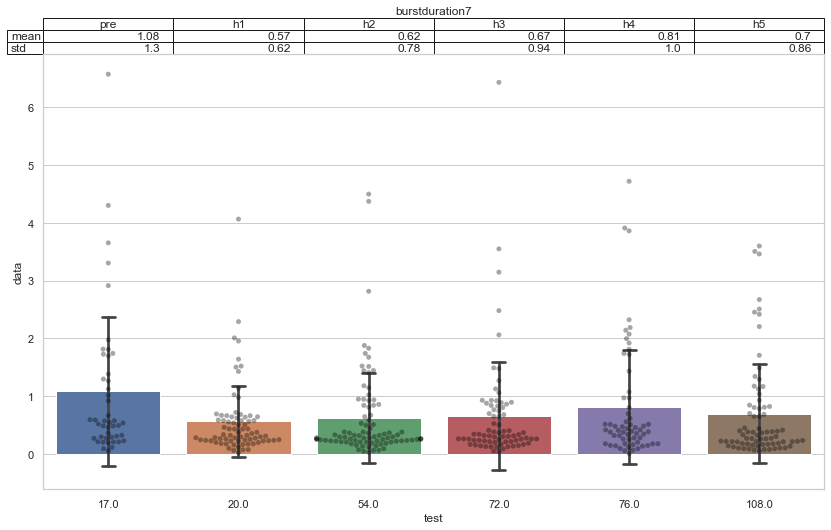

<Figure size 432x288 with 0 Axes>

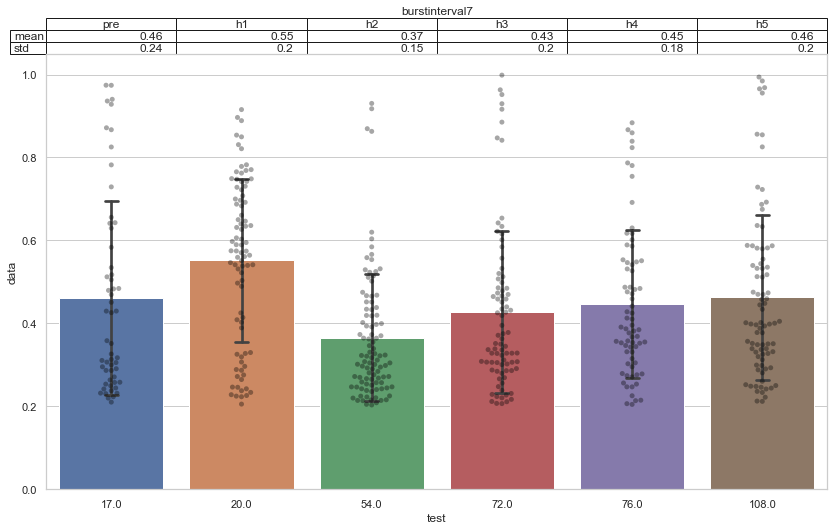

<Figure size 432x288 with 0 Axes>

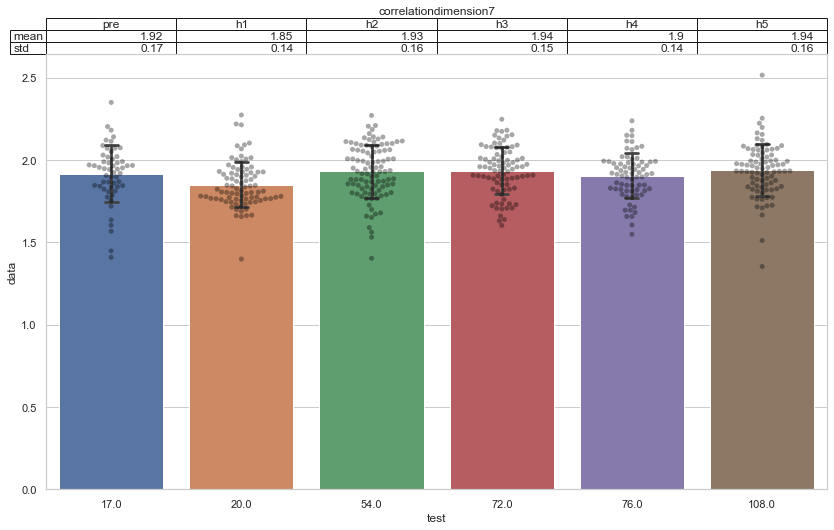

<Figure size 432x288 with 0 Axes>

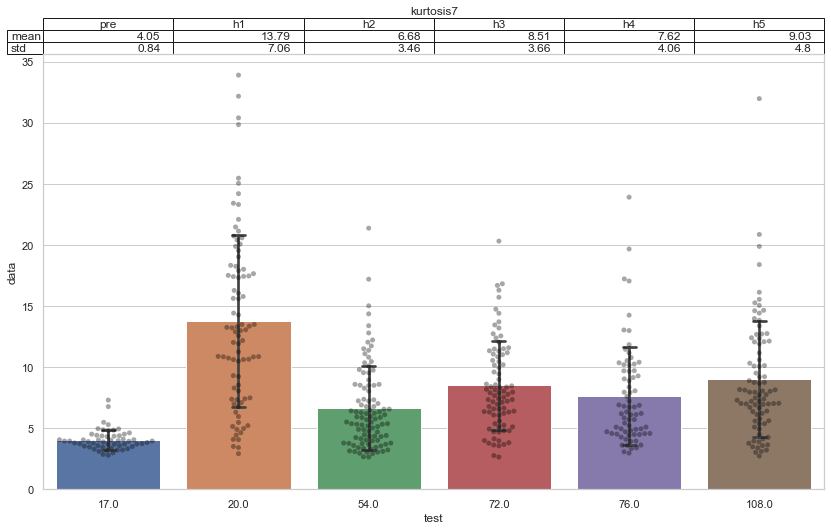

<Figure size 432x288 with 0 Axes>

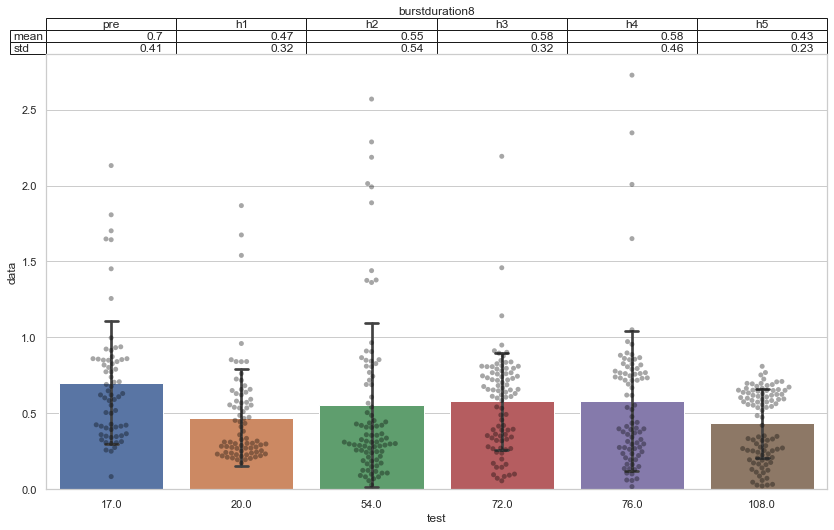

<Figure size 432x288 with 0 Axes>

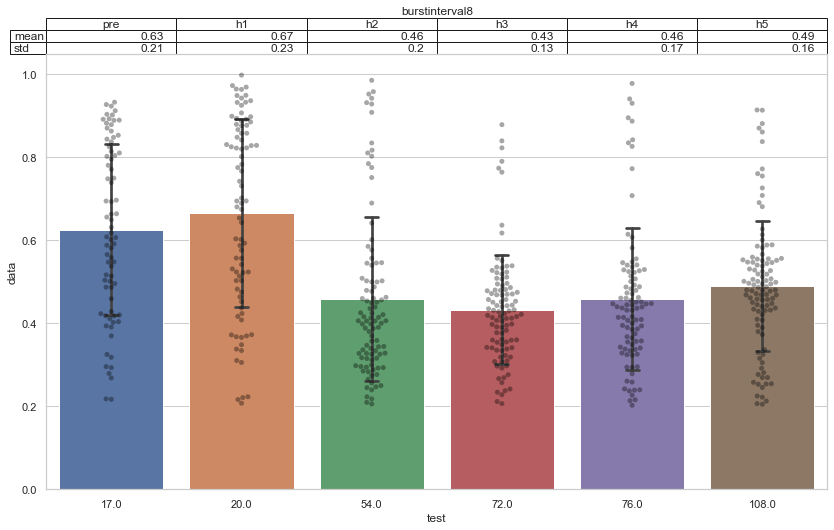

<Figure size 432x288 with 0 Axes>

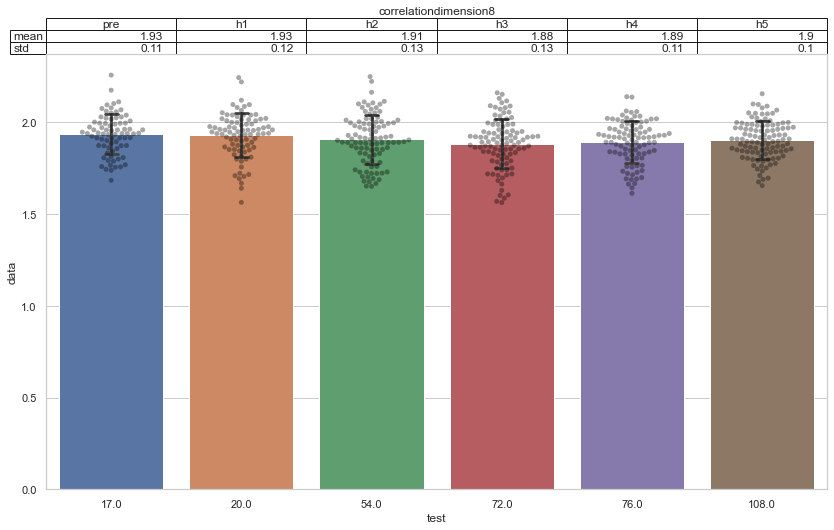

<Figure size 432x288 with 0 Axes>

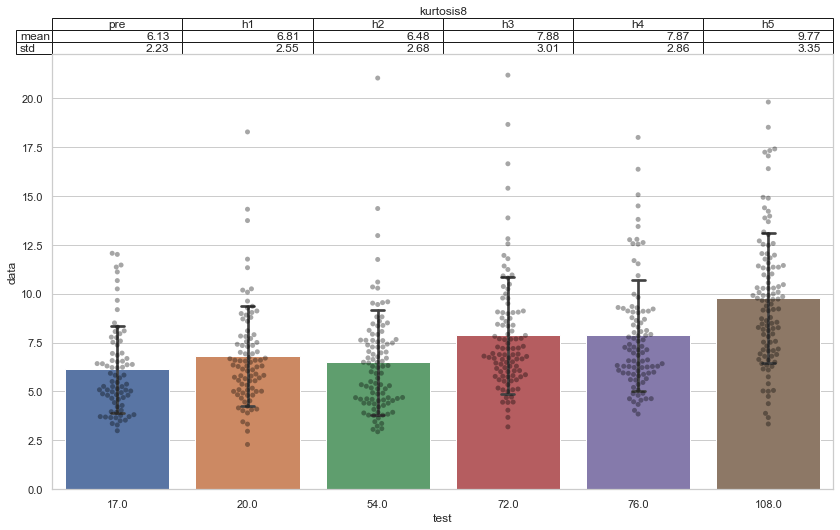

<Figure size 432x288 with 0 Axes>

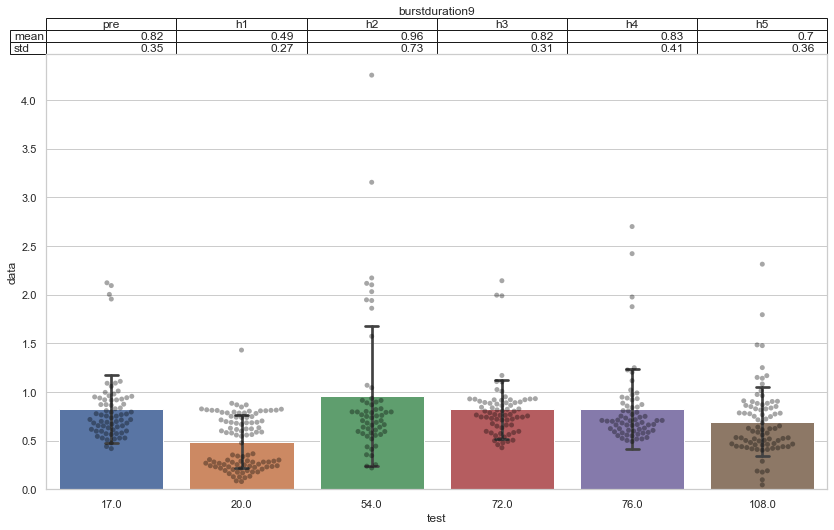

<Figure size 432x288 with 0 Axes>

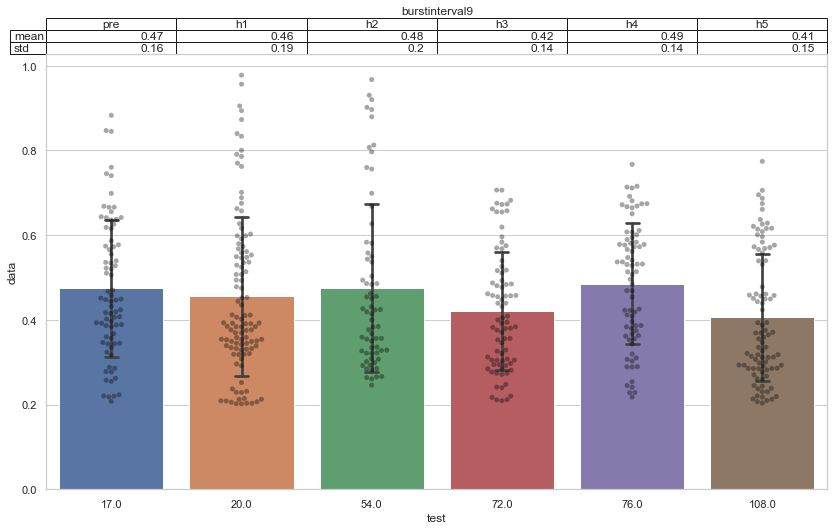

<Figure size 432x288 with 0 Axes>

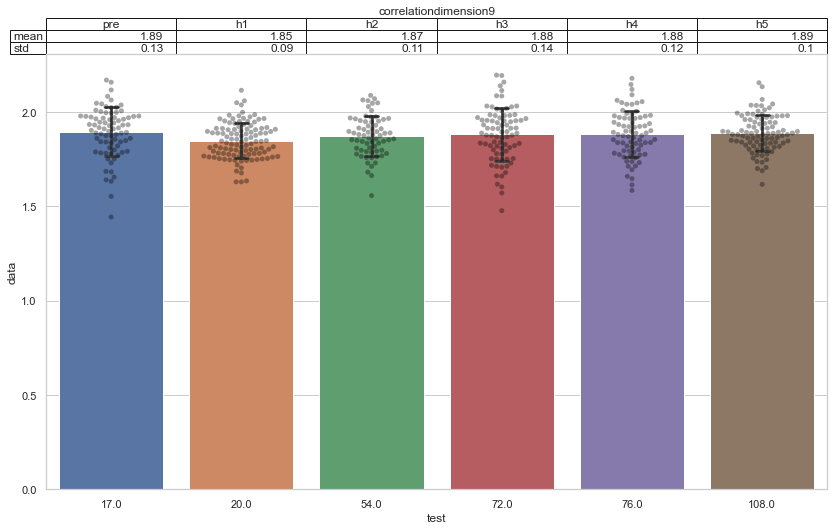

<Figure size 432x288 with 0 Axes>

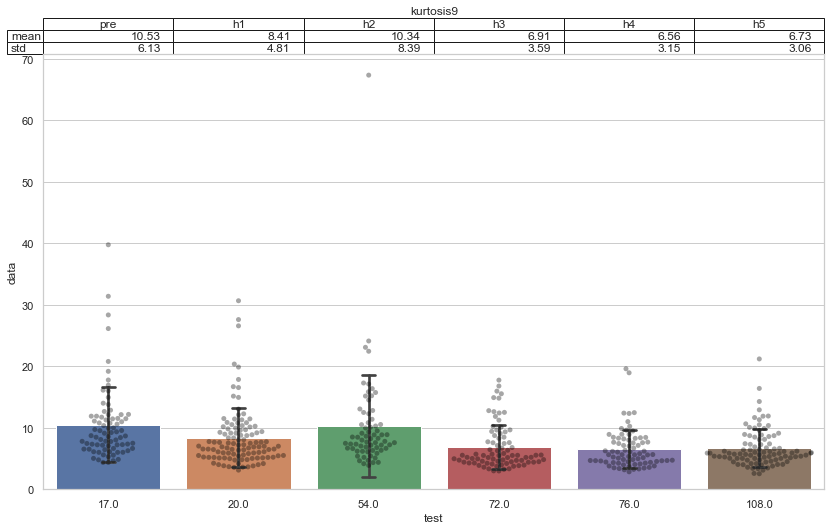

<Figure size 432x288 with 0 Axes>

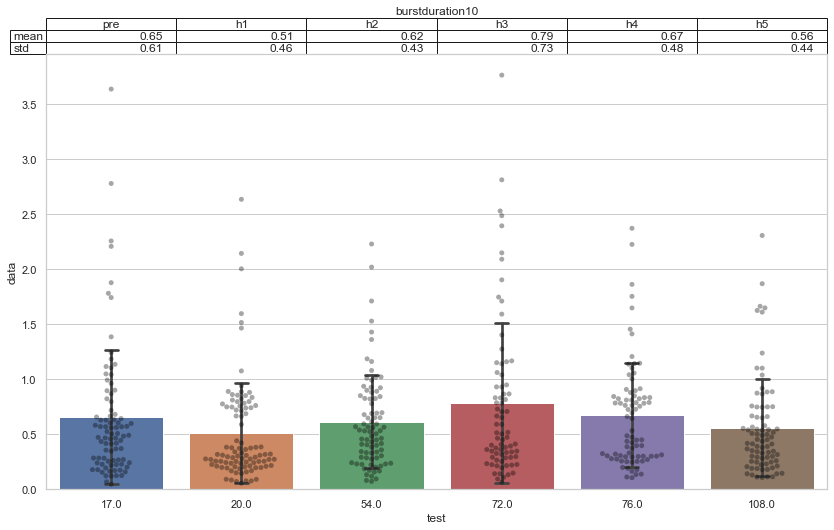

<Figure size 432x288 with 0 Axes>

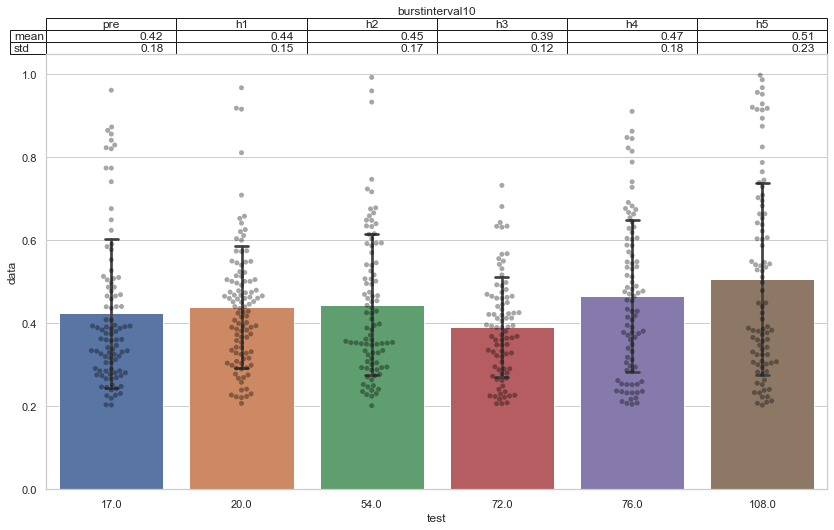

<Figure size 432x288 with 0 Axes>

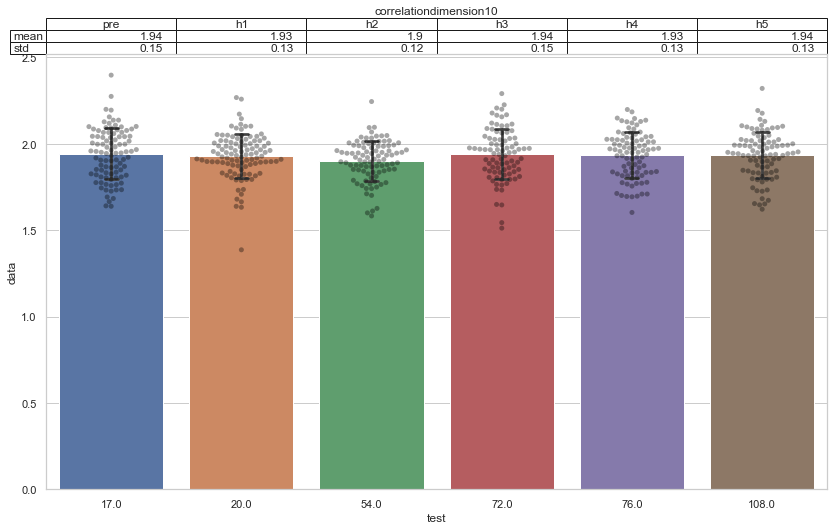

<Figure size 432x288 with 0 Axes>

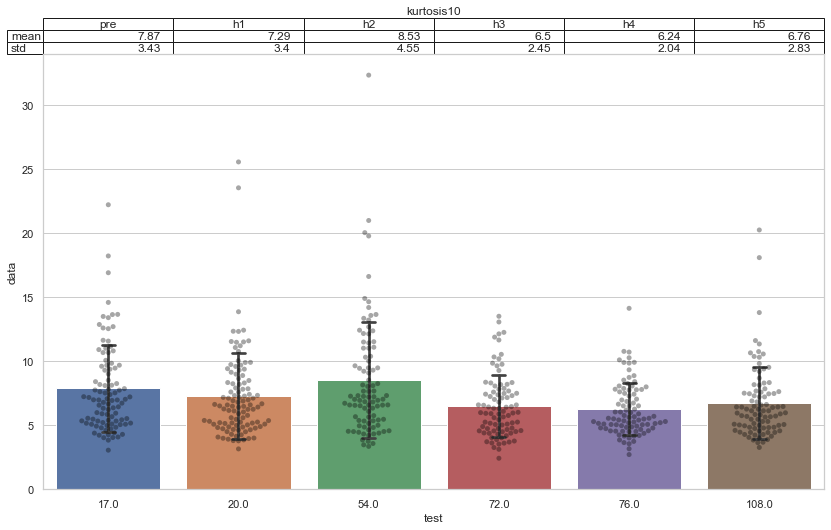

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

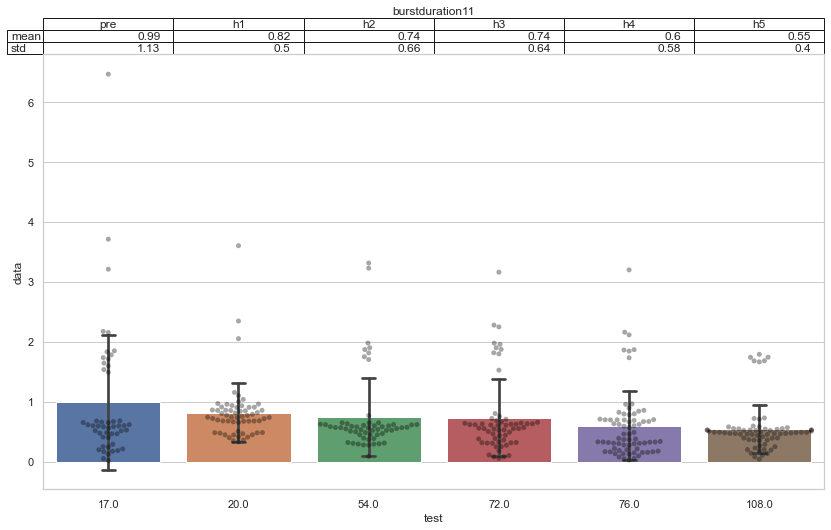

<Figure size 432x288 with 0 Axes>

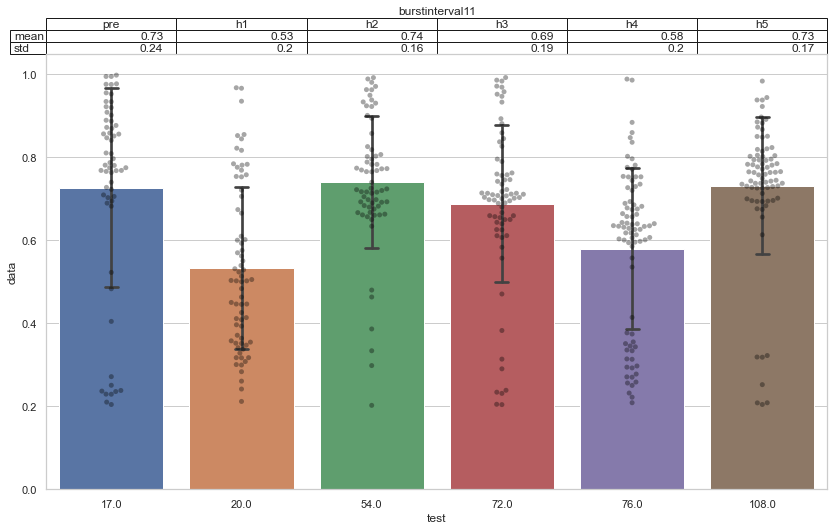

<Figure size 432x288 with 0 Axes>

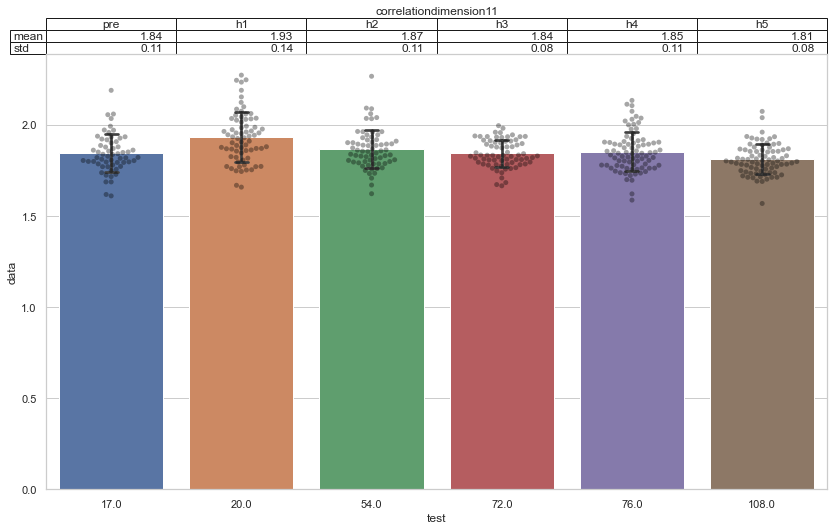

<Figure size 432x288 with 0 Axes>

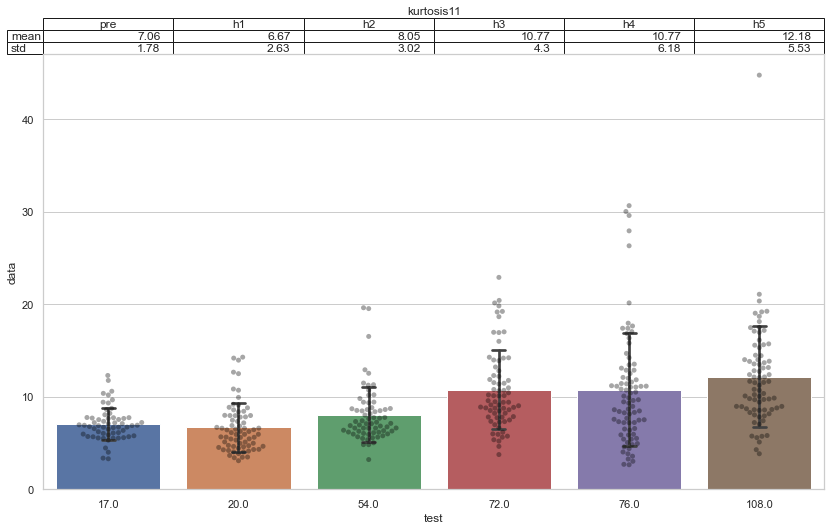

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

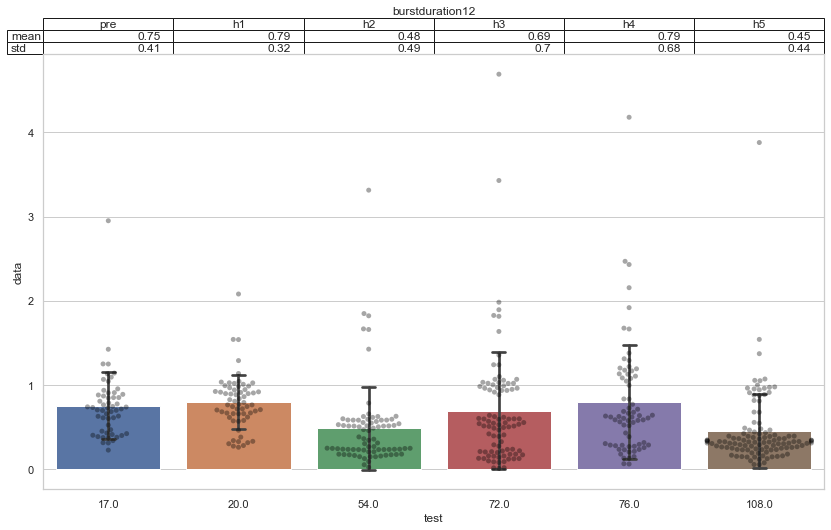

<Figure size 432x288 with 0 Axes>

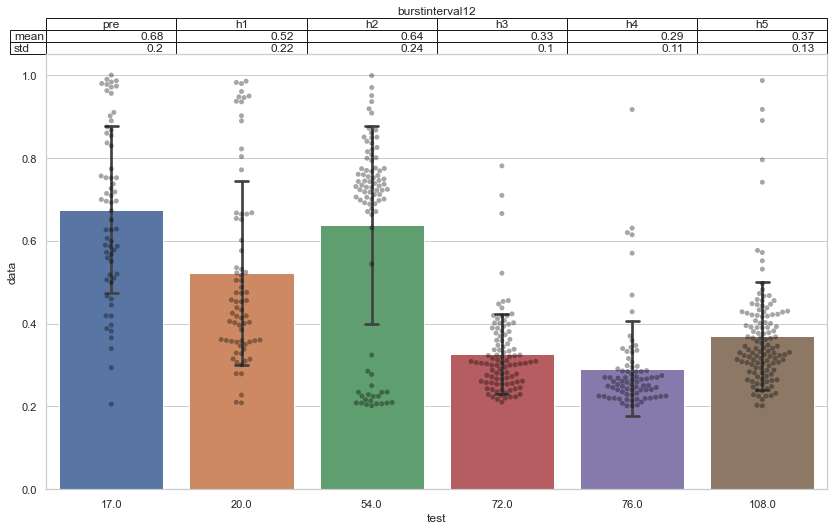

<Figure size 432x288 with 0 Axes>

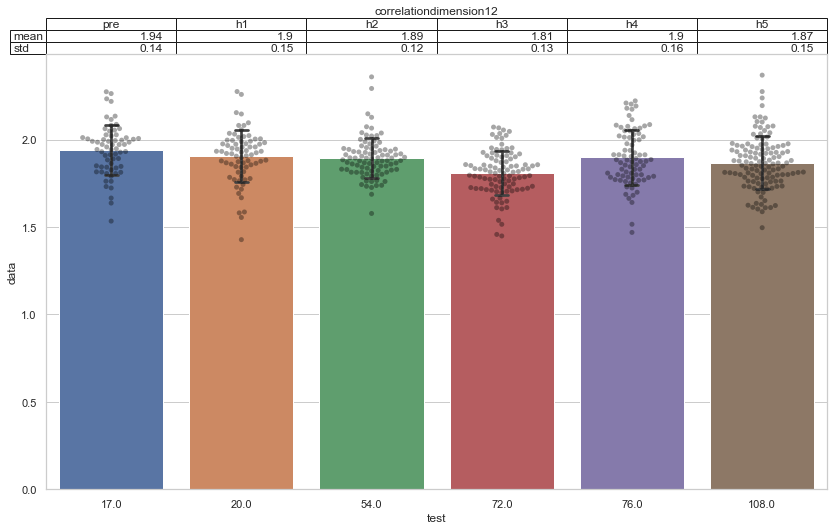

<Figure size 432x288 with 0 Axes>

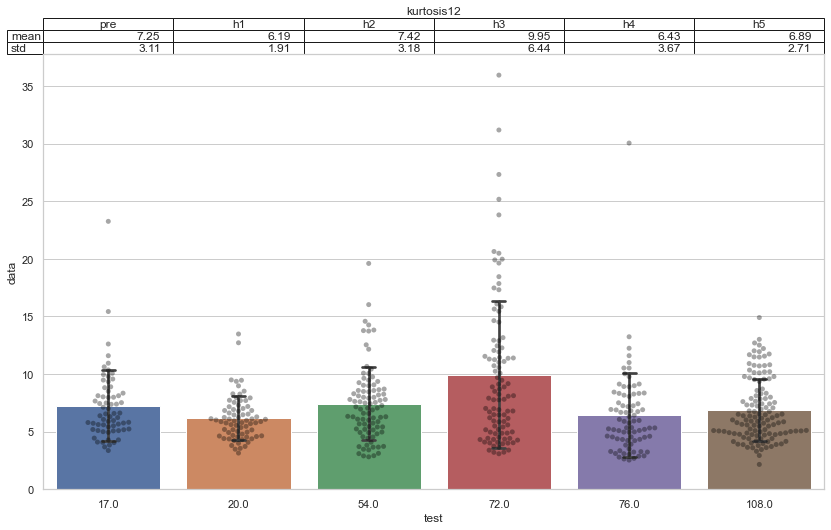

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

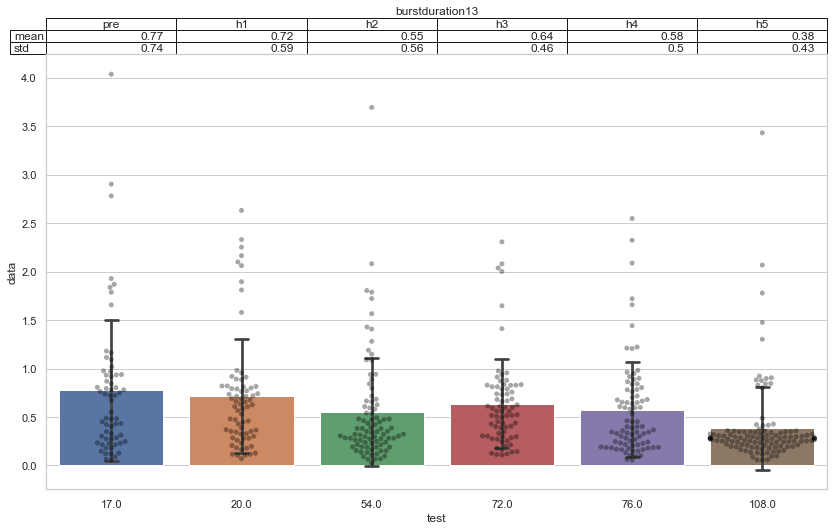

<Figure size 432x288 with 0 Axes>

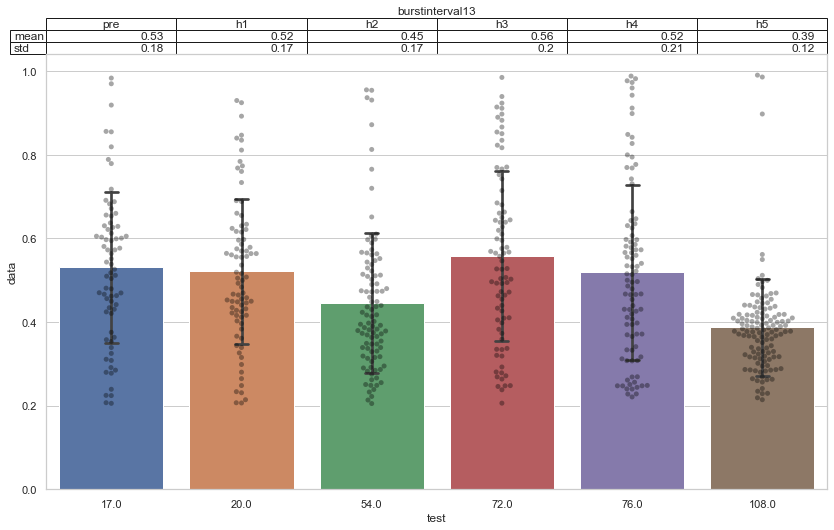

<Figure size 432x288 with 0 Axes>

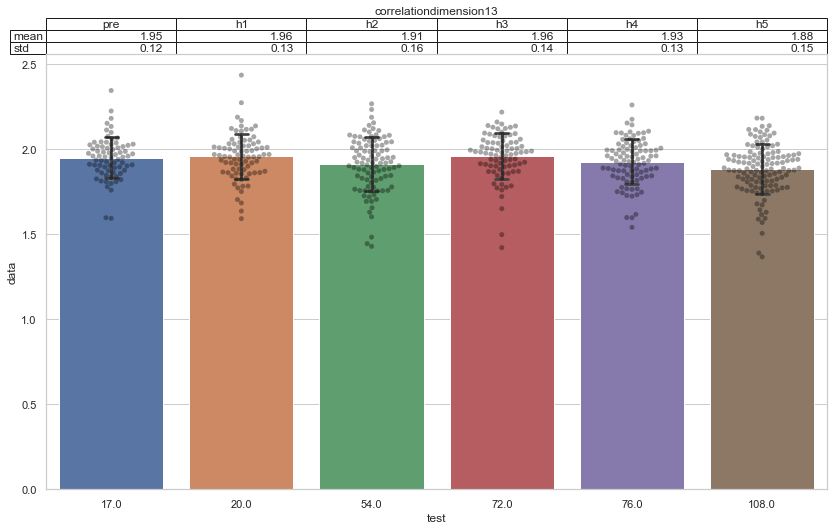

<Figure size 432x288 with 0 Axes>

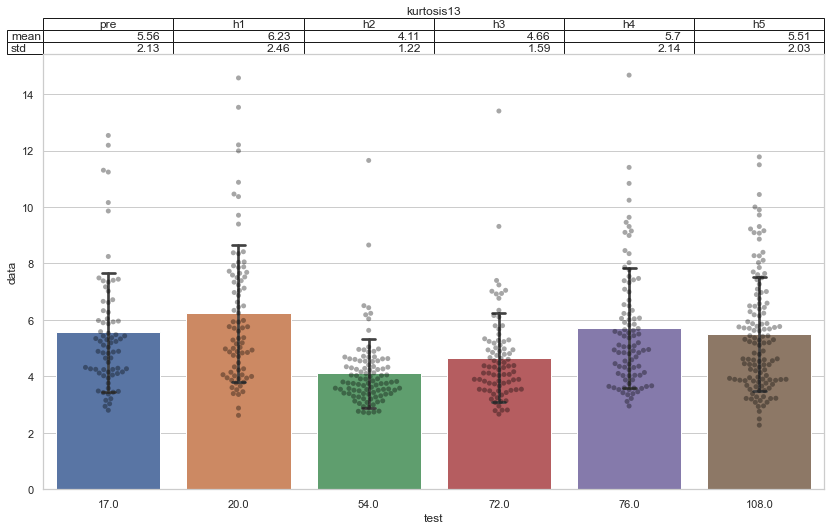

<Figure size 432x288 with 0 Axes>

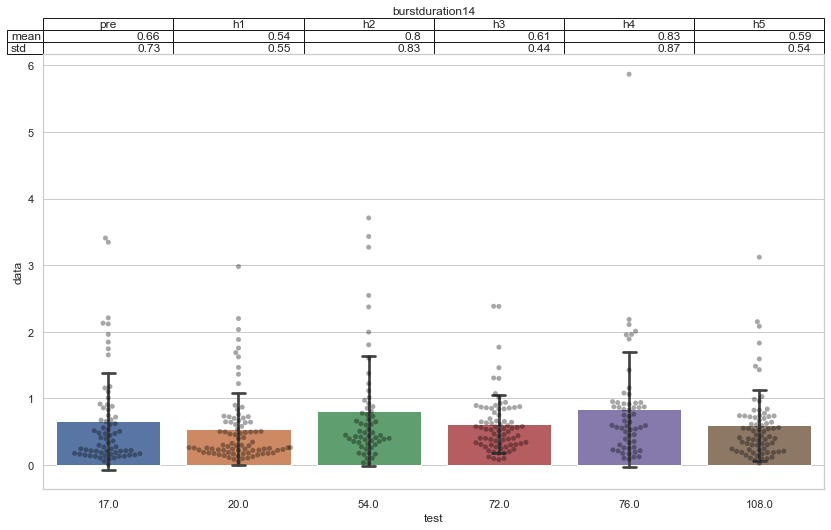

<Figure size 432x288 with 0 Axes>

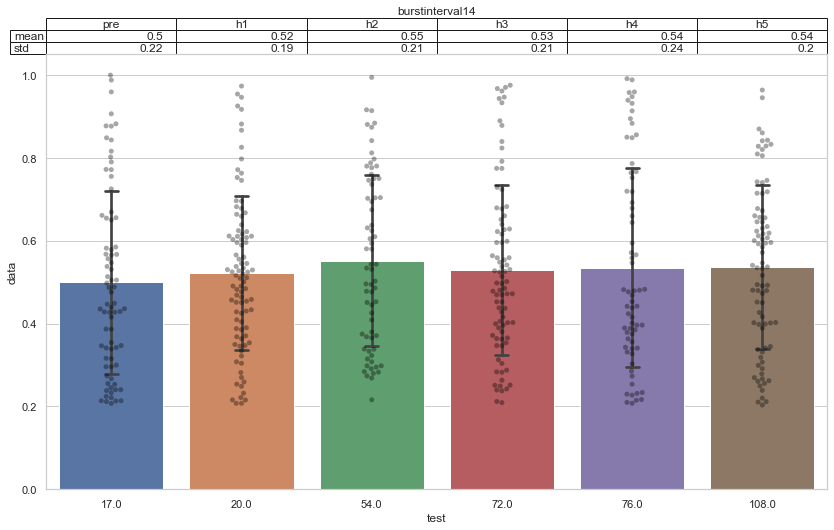

<Figure size 432x288 with 0 Axes>

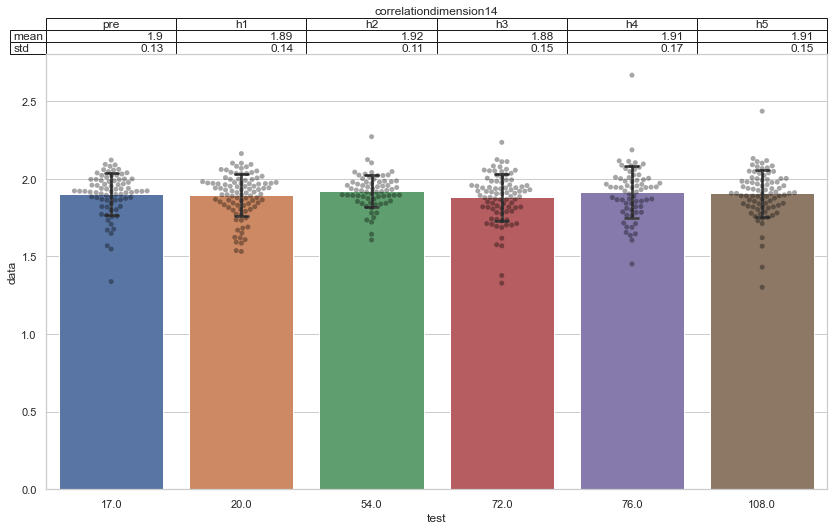

<Figure size 432x288 with 0 Axes>

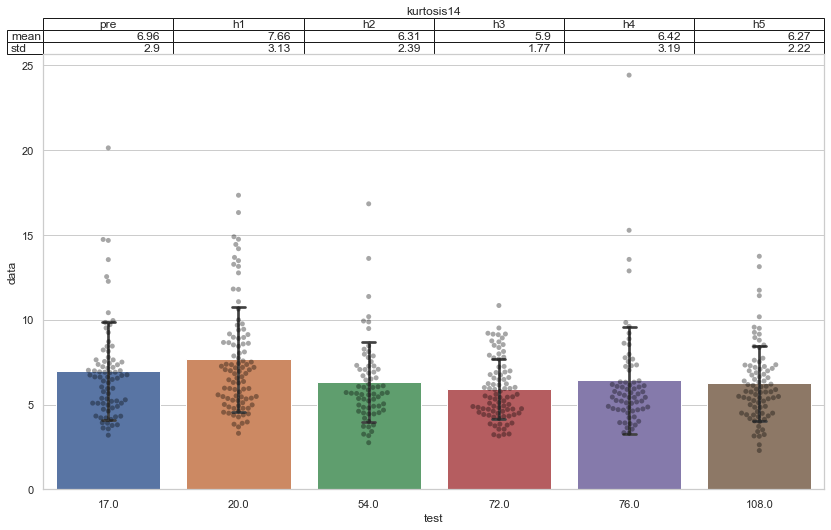

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

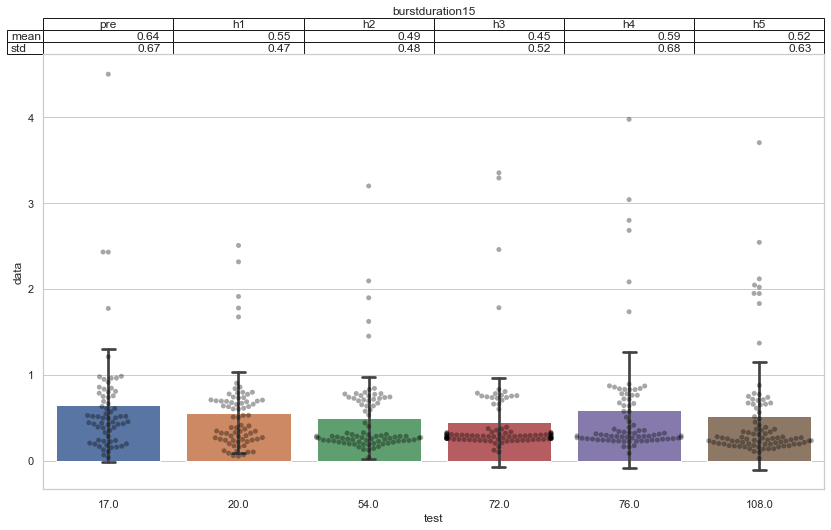

<Figure size 432x288 with 0 Axes>

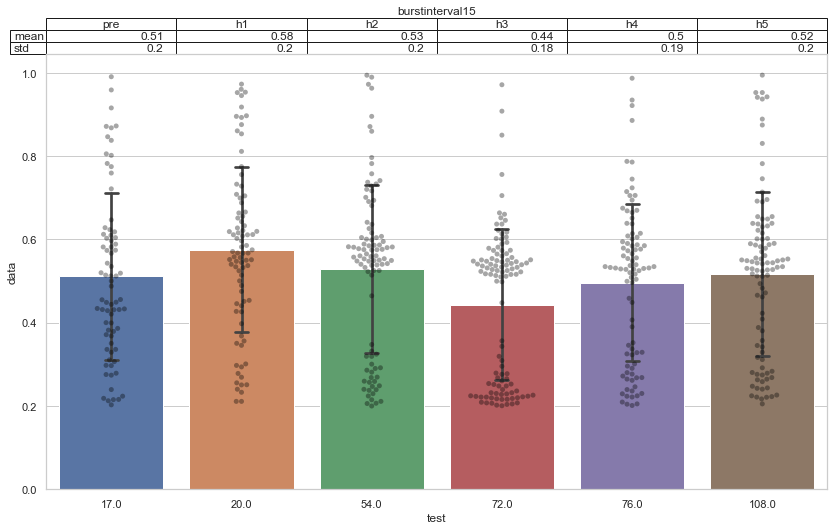

<Figure size 432x288 with 0 Axes>

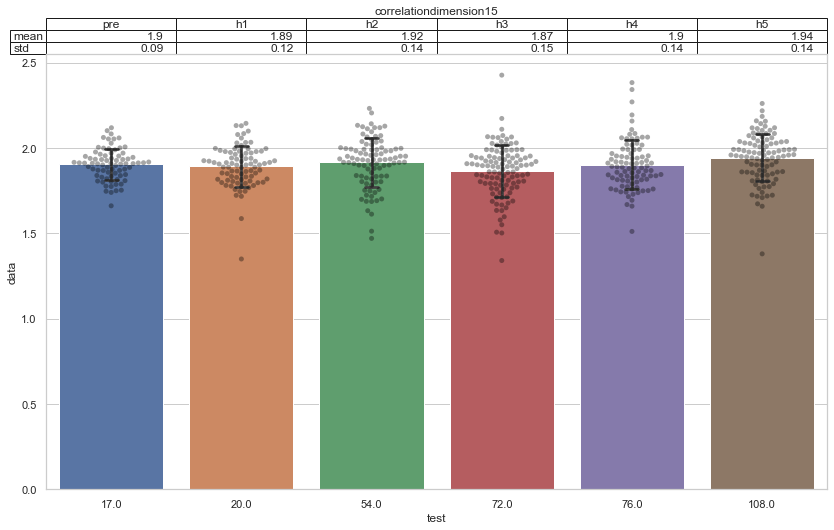

<Figure size 432x288 with 0 Axes>

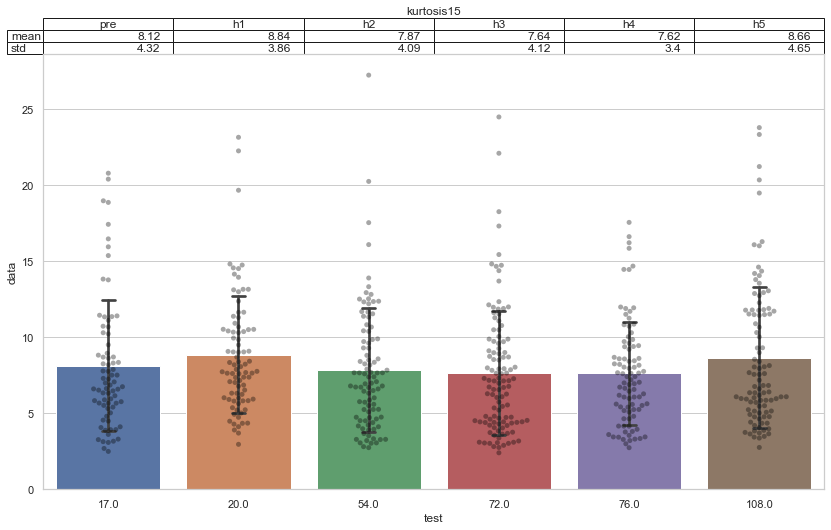

<Figure size 432x288 with 0 Axes>

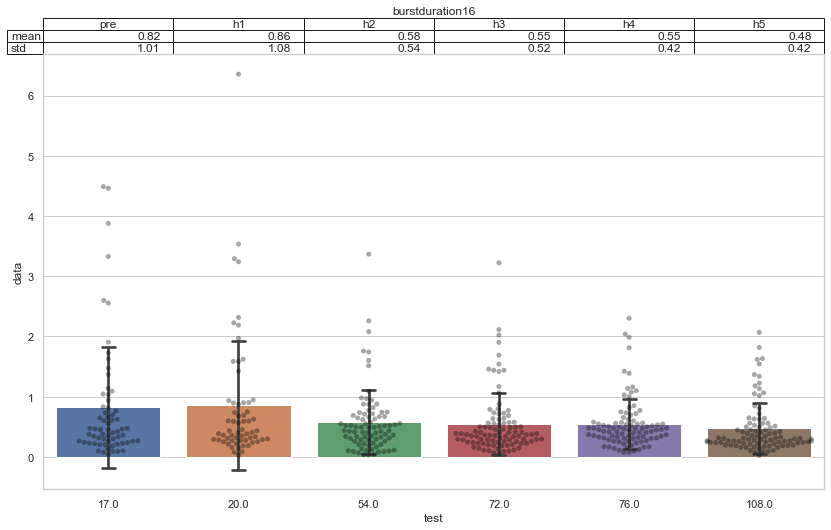

<Figure size 432x288 with 0 Axes>

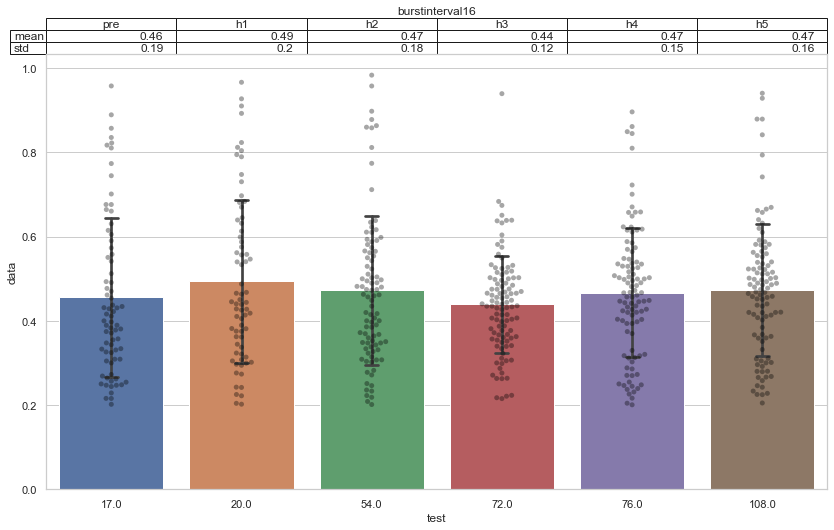

<Figure size 432x288 with 0 Axes>

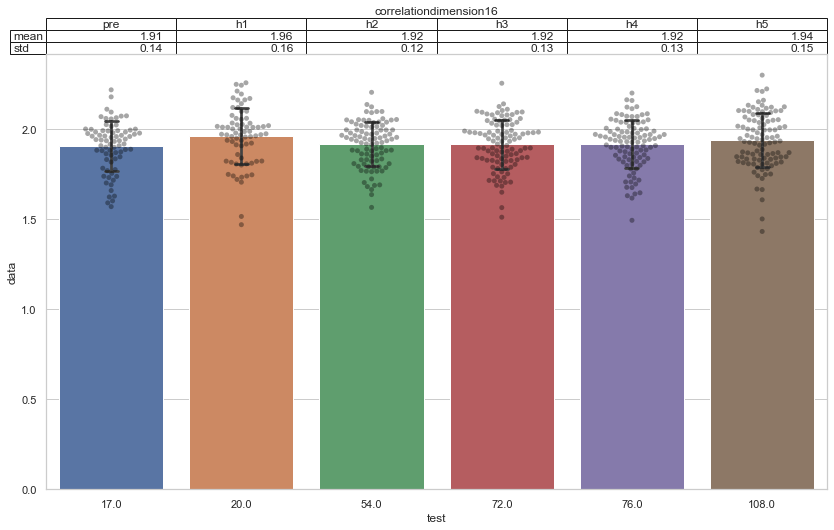

<Figure size 432x288 with 0 Axes>

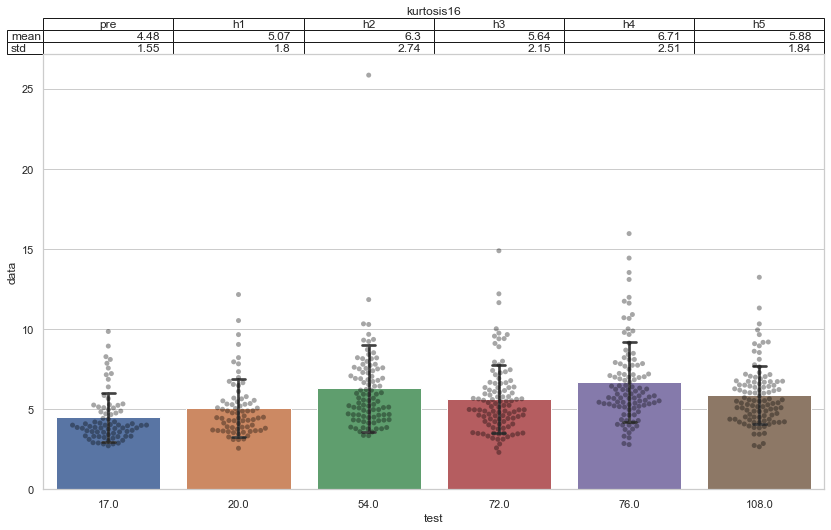

<Figure size 432x288 with 0 Axes>

In [37]:
df = pd.DataFrame()
data=[]
index=['burstduration','burstinterval','correlationdimension','kurtosis']
rows=["mean","std"]
for i in range(16):
    Data = pd.DataFrame()
    for filename in listdir(mypath):  
        fullpath = join(mypath,filename)
        name=fullpath.split("_")[testorder]   
        for t in test:
            if ((testname+str(t)) in name):
                data = pd.read_excel(fullpath, sheet_name=None)
                sheet = pd.ExcelFile(fullpath)               

                le=len(getburst(data)[4][i])                 
                my_array = np.array([np.full(le,int(t)),np.full(le,i),np.full(le,0),getburst(data)[4][i]])
                
                my_array=my_array.transpose((1, 0))
                df = pd.DataFrame(my_array, columns = ['test','pca','part','data'])
                Data=pd.concat([Data, df], axis=0)
                le=len(getburst(data)[5][i])                 
                my_array = np.array([np.full(le,int(t)),np.full(le,i),np.full(le,1),getburst(data)[5][i]])
                my_array=my_array.transpose((1, 0))
                df = pd.DataFrame(my_array, columns = ['test','pca','part','data'])
                Data=pd.concat([Data, df], axis=0)
                le=len(get_corr(data)[2][i])                 
                my_array = np.array([np.full(le,int(t)),np.full(le,i),np.full(le,2),get_corr(data)[2][i]])
                my_array=my_array.transpose((1, 0))
                df = pd.DataFrame(my_array, columns = ['test','pca','part','data'])
                Data=pd.concat([Data, df], axis=0)
                le=len(get_ku(data)[2][i])                 
                my_array = np.array([np.full(le,int(t)),np.full(le,i),np.full(le,3),get_ku(data)[2][i]])
                my_array=my_array.transpose((1, 0))
                df = pd.DataFrame(my_array, columns = ['test','pca','part','data'])
                Data=pd.concat([Data, df], axis=0)
                
    for k in range(4):                         
        fig, ax = plt.subplots(figsize = (14,8))
        sns.set(style="whitegrid")

        sns.barplot(x="test", y="data", data=Data[Data['pca'].isin([i])&Data['part'].isin([k])], capsize=.1, ci="sd")
        sns.swarmplot(x="test", y="data", data=Data[Data['pca'].isin([i])&Data['part'].isin([k])], color="0", alpha=.35)
        
        df=Data[Data['pca'].isin([i])&Data['part'].isin([k])]
        m=df.groupby(['test']).mean()['data']
        Mean = [round(item, 2) for item in m]
        s=df.groupby(['test']).std()['data']
        Std = [round(item, 2) for item in s]
        arr=[Mean,Std]
        
        plt.title(label=index[k]+str(i+1), 
                  fontweight=10, 
                  pad='40.0')

        the_table = plt.table(cellText=arr,
                          rowLabels=rows,
                          colLabels=label,
                          loc='top')
        fig.savefig(folder+'_bar_'+index[k]+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
        plt.show()
        plt.figure().clear()